# Email Marketing Campaign Success Prediction

In [2]:
# The Objective of this Project is to predict whether a customer will open an email in an email marketing campaign.

In [4]:
# 1. EDA
# 2. Model building
# 3. Model Evaluation
# 4. Deployment

# 1. EDA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load the Excel file
excel_file = 'Email_Marketing_Campaign_Dataset_Rounded.xlsx'
sheet_name = 'Sheet1'  

In [13]:
# List all sheet names 
sheet_names = pd.ExcelFile('Email_Marketing_Campaign_Dataset_Rounded.xlsx').sheet_names
print("Available sheets:", sheet_names)

Available sheets: ['Sheet1']


In [14]:
# Read the data with 'Sheet1' sheet
df = pd.read_excel(excel_file, sheet_name='Sheet1')

In [17]:
df

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
995            32              7               2            1514.2   
996            52              4               2             461.1   
997            41              3               0            1339.9   
998            29              4               2            2321.7   
999            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
995                    4.9                    32                       65.5   
996                    6.4                    47                       81.5   
997                   11.2                    11                       62.1   
998                    6.6                    37                       69.9   
999                    3.3                    12                       76.0   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                         0                        1            1  
1                         1                        0            1  
2                         0                        0            1  
3                         0                        1            0  
4                         0                        0            1  
..                      ...                      ...          ...  
995                       0                        1            0  
996                       0                        1            1  
997                       0                        0            0  
998                       0                        1            1  
999                       1                        1            1  

[1000 rows x 10 columns]

In [19]:
# Save the DataFrame as a CSV file
csv_file = 'Email_Marketing_Campaign_Dataset_Rounded.csv'
df.to_csv(csv_file, index=False)

In [21]:
df

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
995            32              7               2            1514.2   
996            52              4               2             461.1   
997            41              3               0            1339.9   
998            29              4               2            2321.7   
999            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
995                    4.9                    32                       65.5   
996                    6.4                    47                       81.5   
997                   11.2                    11                       62.1   
998                    6.6                    37                       69.9   
999                    3.3                    12                       76.0   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                         0                        1            1  
1                         1                        0            1  
2                         0                        0            1  
3                         0                        1            0  
4                         0                        0            1  
..                      ...                      ...          ...  
995                       0                        1            0  
996                       0                        1            1  
997                       0                        0            0  
998                       0                        1            1  
999                       1                        1            1  

[1000 rows x 10 columns]

In [23]:
df.shape

(1000, 10)

In [25]:
df.size

10000

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_Age               1000 non-null   int64  
 1   Emails_Opened              1000 non-null   int64  
 2   Emails_Clicked             1000 non-null   int64  
 3   Purchase_History           1000 non-null   float64
 4   Time_Spent_On_Website      1000 non-null   float64
 5   Days_Since_Last_Open       1000 non-null   int64  
 6   Customer_Engagement_Score  1000 non-null   float64
 7   Opened_Previous_Emails     1000 non-null   int64  
 8   Clicked_Previous_Emails    1000 non-null   int64  
 9   Device_Type                1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.3 KB


In [29]:
# check missing values
df.isnull().sum()

Customer_Age                 0
Emails_Opened                0
Emails_Clicked               0
Purchase_History             0
Time_Spent_On_Website        0
Days_Since_Last_Open         0
Customer_Engagement_Score    0
Opened_Previous_Emails       0
Clicked_Previous_Emails      0
Device_Type                  0
dtype: int64

In [31]:
# there is no null values present in the data

In [33]:
# summary statistics
df.describe()

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
count   1000.000000    1000.000000     1000.000000        1000.00000   
mean      34.674000       4.654000        1.515000        1490.63990   
std        9.797741       2.008561        0.966804         513.56673   
min        2.000000       0.000000        0.000000          35.30000   
25%       28.000000       3.000000        1.000000        1131.27500   
50%       35.000000       5.000000        1.500000        1500.05000   
75%       41.000000       6.000000        2.000000        1833.47500   
max       73.000000      11.000000        5.000000        3121.50000   

       Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
count            1000.000000           1000.000000                1000.000000   
mean                4.901600             28.950000                  69.578100   
std                 1.985719             14.797448                  15.375871   
min                -1.400000              0.000000                  29.300000   
25%                 3.600000             19.000000                  58.700000   
50%                 5.000000             29.000000                  69.150000   
75%                 6.300000             39.000000                  80.500000   
max                11.200000             76.000000                 122.900000   

       Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
count             1000.000000              1000.000000  1000.000000  
mean                 0.513000                 0.518000     0.517000  
std                  0.500081                 0.499926     0.499961  
min                  0.000000                 0.000000     0.000000  
25%                  0.000000                 0.000000     0.000000  
50%                  1.000000                 1.000000     1.000000  
75%                  1.000000                 1.000000     1.000000  
max                  1.000000                 1.000000     1.000000

In [35]:
# finding duplicates present in the data
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [37]:
df[df.duplicated()]

Empty DataFrame
Columns: [Customer_Age, Emails_Opened, Emails_Clicked, Purchase_History, Time_Spent_On_Website, Days_Since_Last_Open, Customer_Engagement_Score, Opened_Previous_Emails, Clicked_Previous_Emails, Device_Type]
Index: []

In [39]:
# there is no duplicates present in the data

In [41]:
# separating target and features

In [43]:
target = df[['Opened_Previous_Emails']]
target

Opened_Previous_Emails
0                         0
1                         1
2                         0
3                         0
4                         0
..                      ...
995                       0
996                       0
997                       0
998                       0
999                       1

[1000 rows x 1 columns]

In [45]:
features = df.drop(columns='Opened_Previous_Emails')
features

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
995            32              7               2            1514.2   
996            52              4               2             461.1   
997            41              3               0            1339.9   
998            29              4               2            2321.7   
999            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
995                    4.9                    32                       65.5   
996                    6.4                    47                       81.5   
997                   11.2                    11                       62.1   
998                    6.6                    37                       69.9   
999                    3.3                    12                       76.0   

     Clicked_Previous_Emails  Device_Type  
0                          1            1  
1                          0            1  
2                          0            1  
3                          1            0  
4                          0            1  
..                       ...          ...  
995                        1            0  
996                        1            1  
997                        0            0  
998                        1            1  
999                        1            1  

[1000 rows x 9 columns]

In [47]:
# Univariate Analysis

In [49]:
# a.Numerical Variables

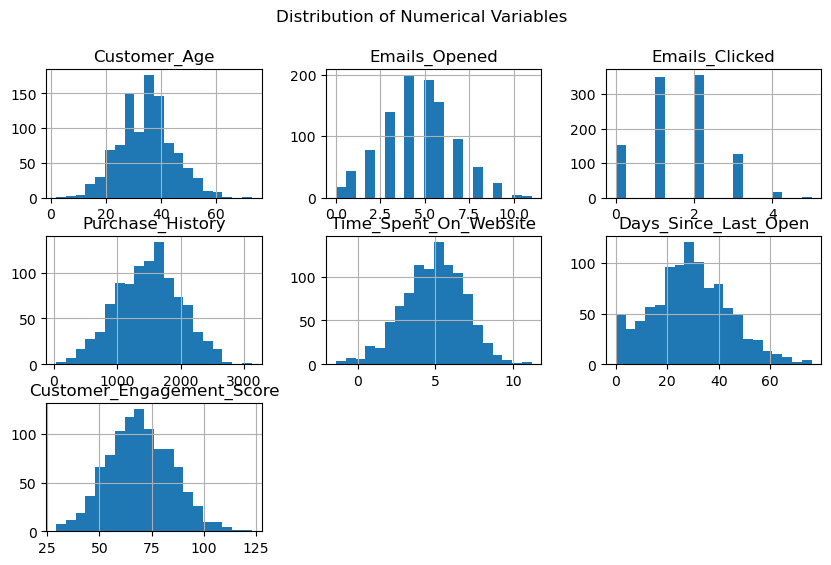

In [51]:
# Histograms for numerical variables
numerical_cols = ['Customer_Age', 'Emails_Opened', 'Emails_Clicked', 'Purchase_History',
                  'Time_Spent_On_Website', 'Days_Since_Last_Open', 'Customer_Engagement_Score']

df[numerical_cols].hist(bins=20, figsize=(10, 6))
plt.suptitle("Distribution of Numerical Variables")
plt.show()

In [52]:
# b. Categorical Variables

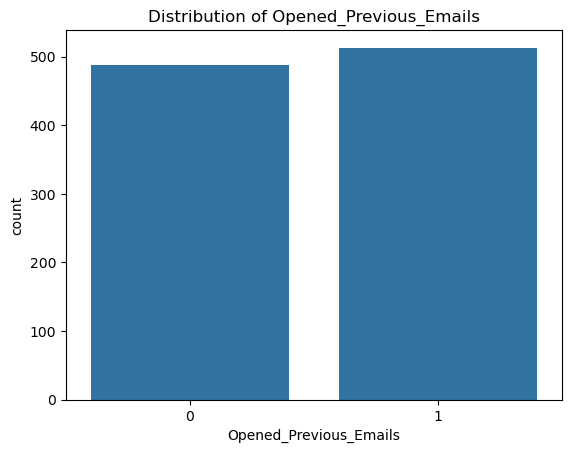

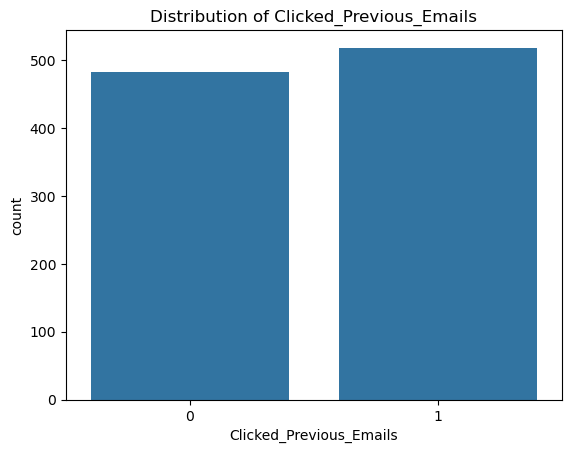

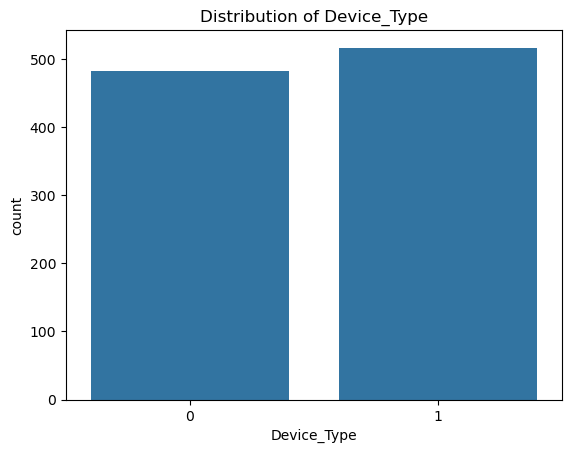

In [55]:
# Bar plots for binary variables
categorical_cols = ['Opened_Previous_Emails', 'Clicked_Previous_Emails', 'Device_Type']

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

In [56]:
# Bivariate analysis

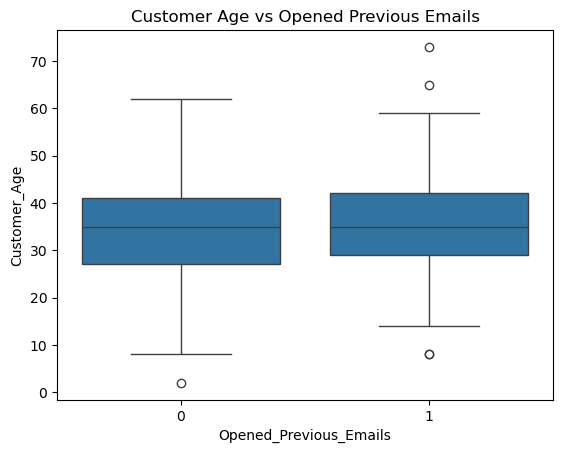

In [57]:
# a.Relationship Between Numerical Variables and Target Variable
# we can use boxplot, histogram, violin plot, scatterplot,...
# Example1: Boxplot of 'Customer_Age' grouped by 'Opened_Previous_Emails'
sns.boxplot(x='Opened_Previous_Emails', y='Customer_Age', data=df)
plt.title("Customer Age vs Opened Previous Emails")
plt.show()

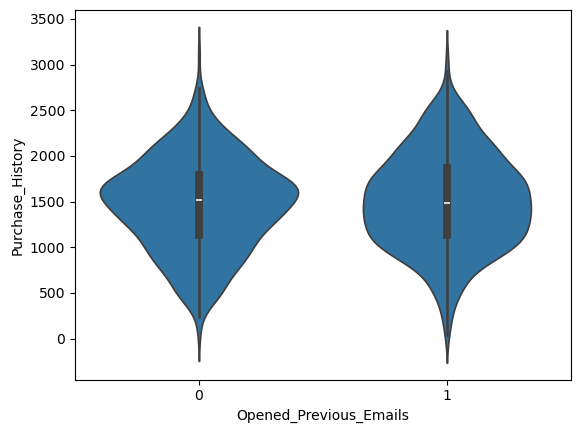

In [61]:
# or by using violin plot 
sns.violinplot(x='Opened_Previous_Emails', y='Purchase_History', data=df)
plt.show()

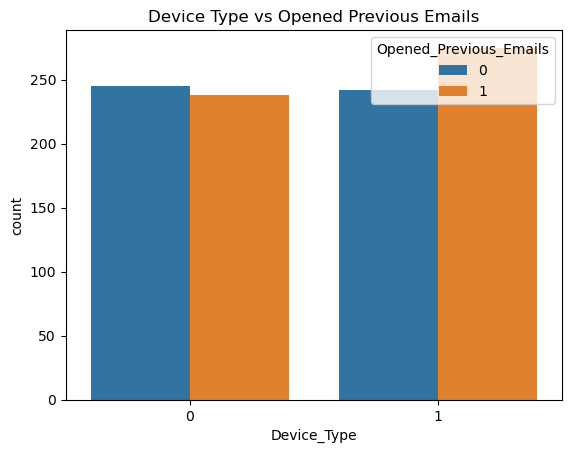

In [62]:
# b. Categorical Variables and Target Variable 
# Countplot of 'Device_Type' by 'Opened_Previous_Emails'
sns.countplot(x='Device_Type', hue='Opened_Previous_Emails', data=df)
plt.title("Device Type vs Opened Previous Emails")
plt.show()

In [64]:
# Multivariate Analysis 

In [67]:
# a.Pairplot for Selected Variables 

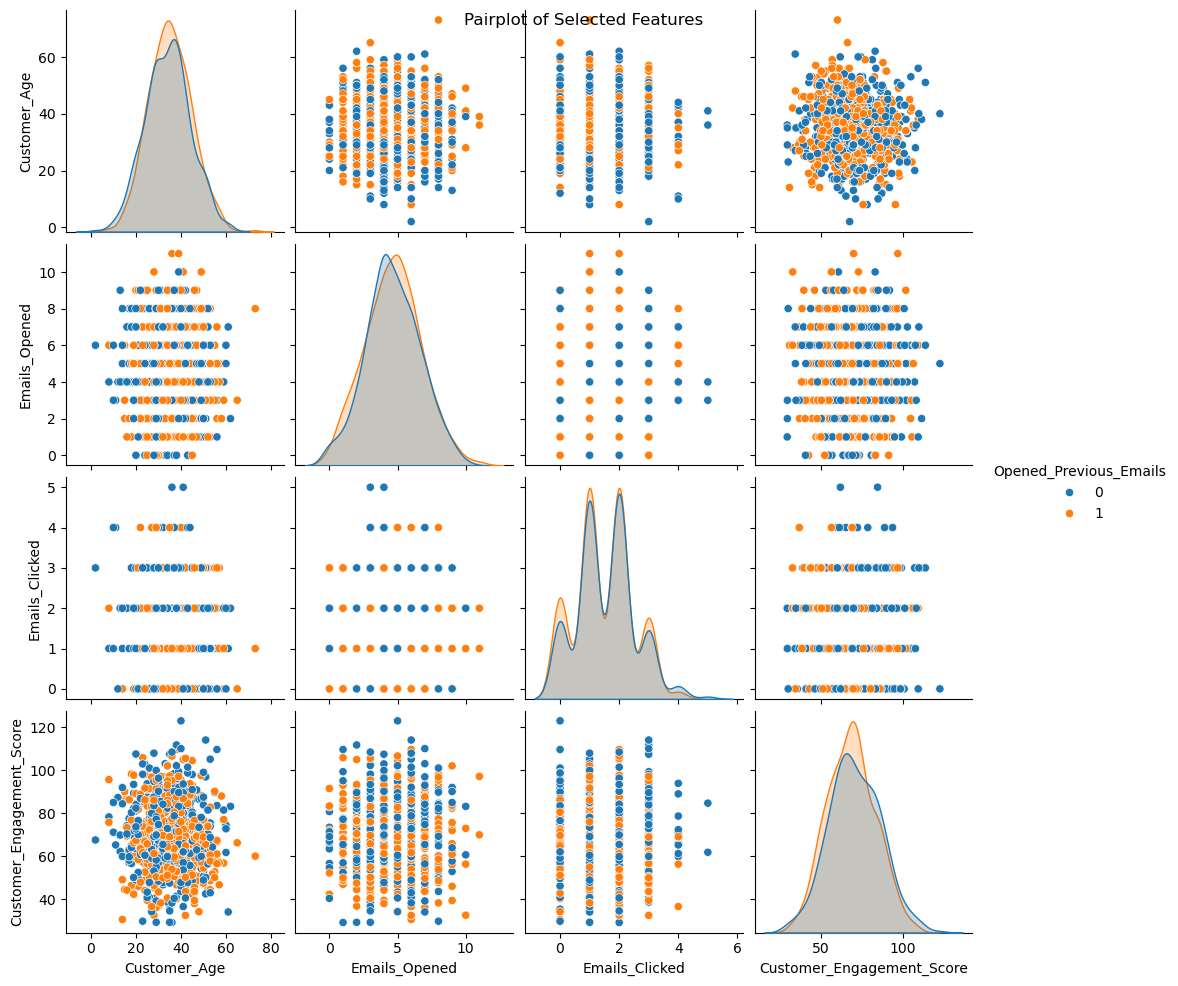

In [69]:
selected_cols = ['Customer_Age', 'Emails_Opened', 'Emails_Clicked',
                 'Customer_Engagement_Score', 'Opened_Previous_Emails']

sns.pairplot(df[selected_cols], hue='Opened_Previous_Emails')
plt.suptitle("Pairplot of Selected Features")
plt.show()

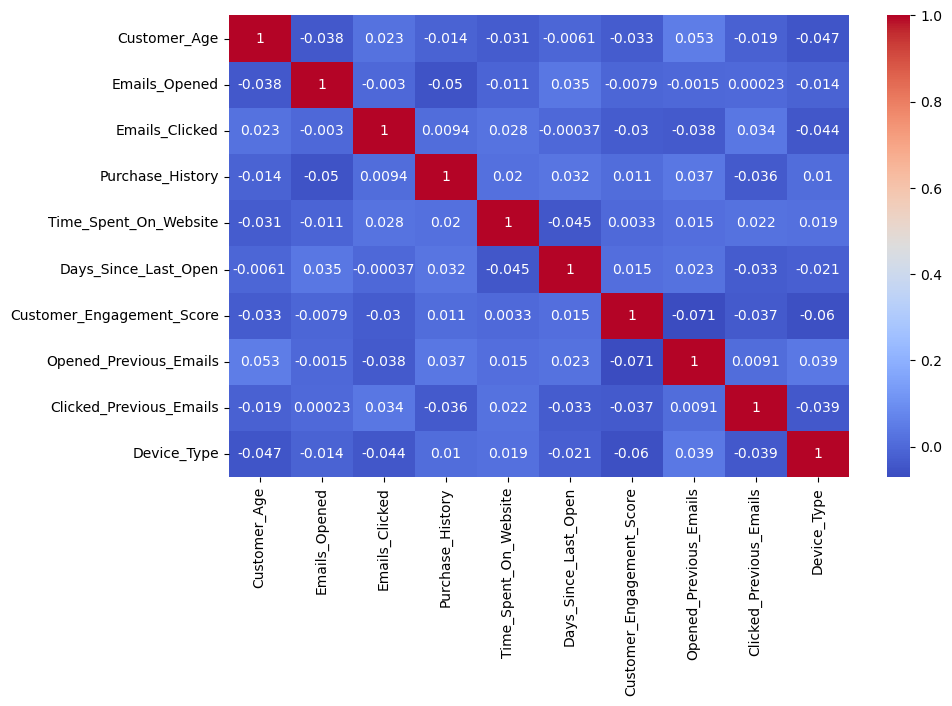

In [70]:
# b.Heatmap to check overall correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

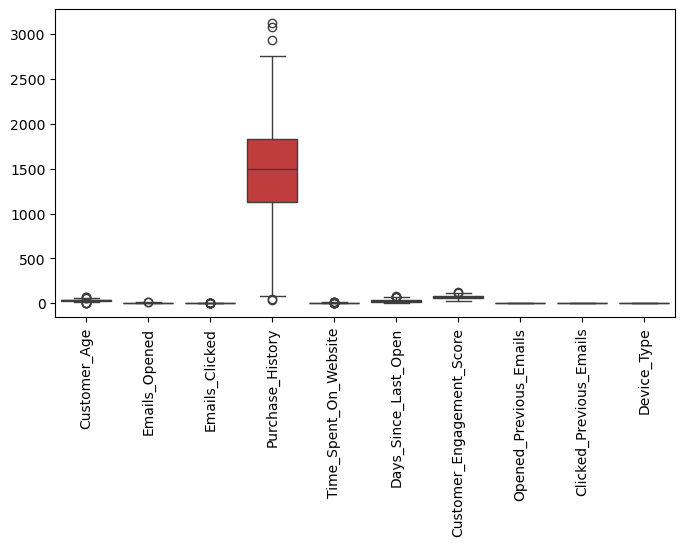

In [73]:
# Boxplots 
plt.figure(figsize=(8,4))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [74]:
# from the boxplot, we got that all the numerical columns have outliers. 

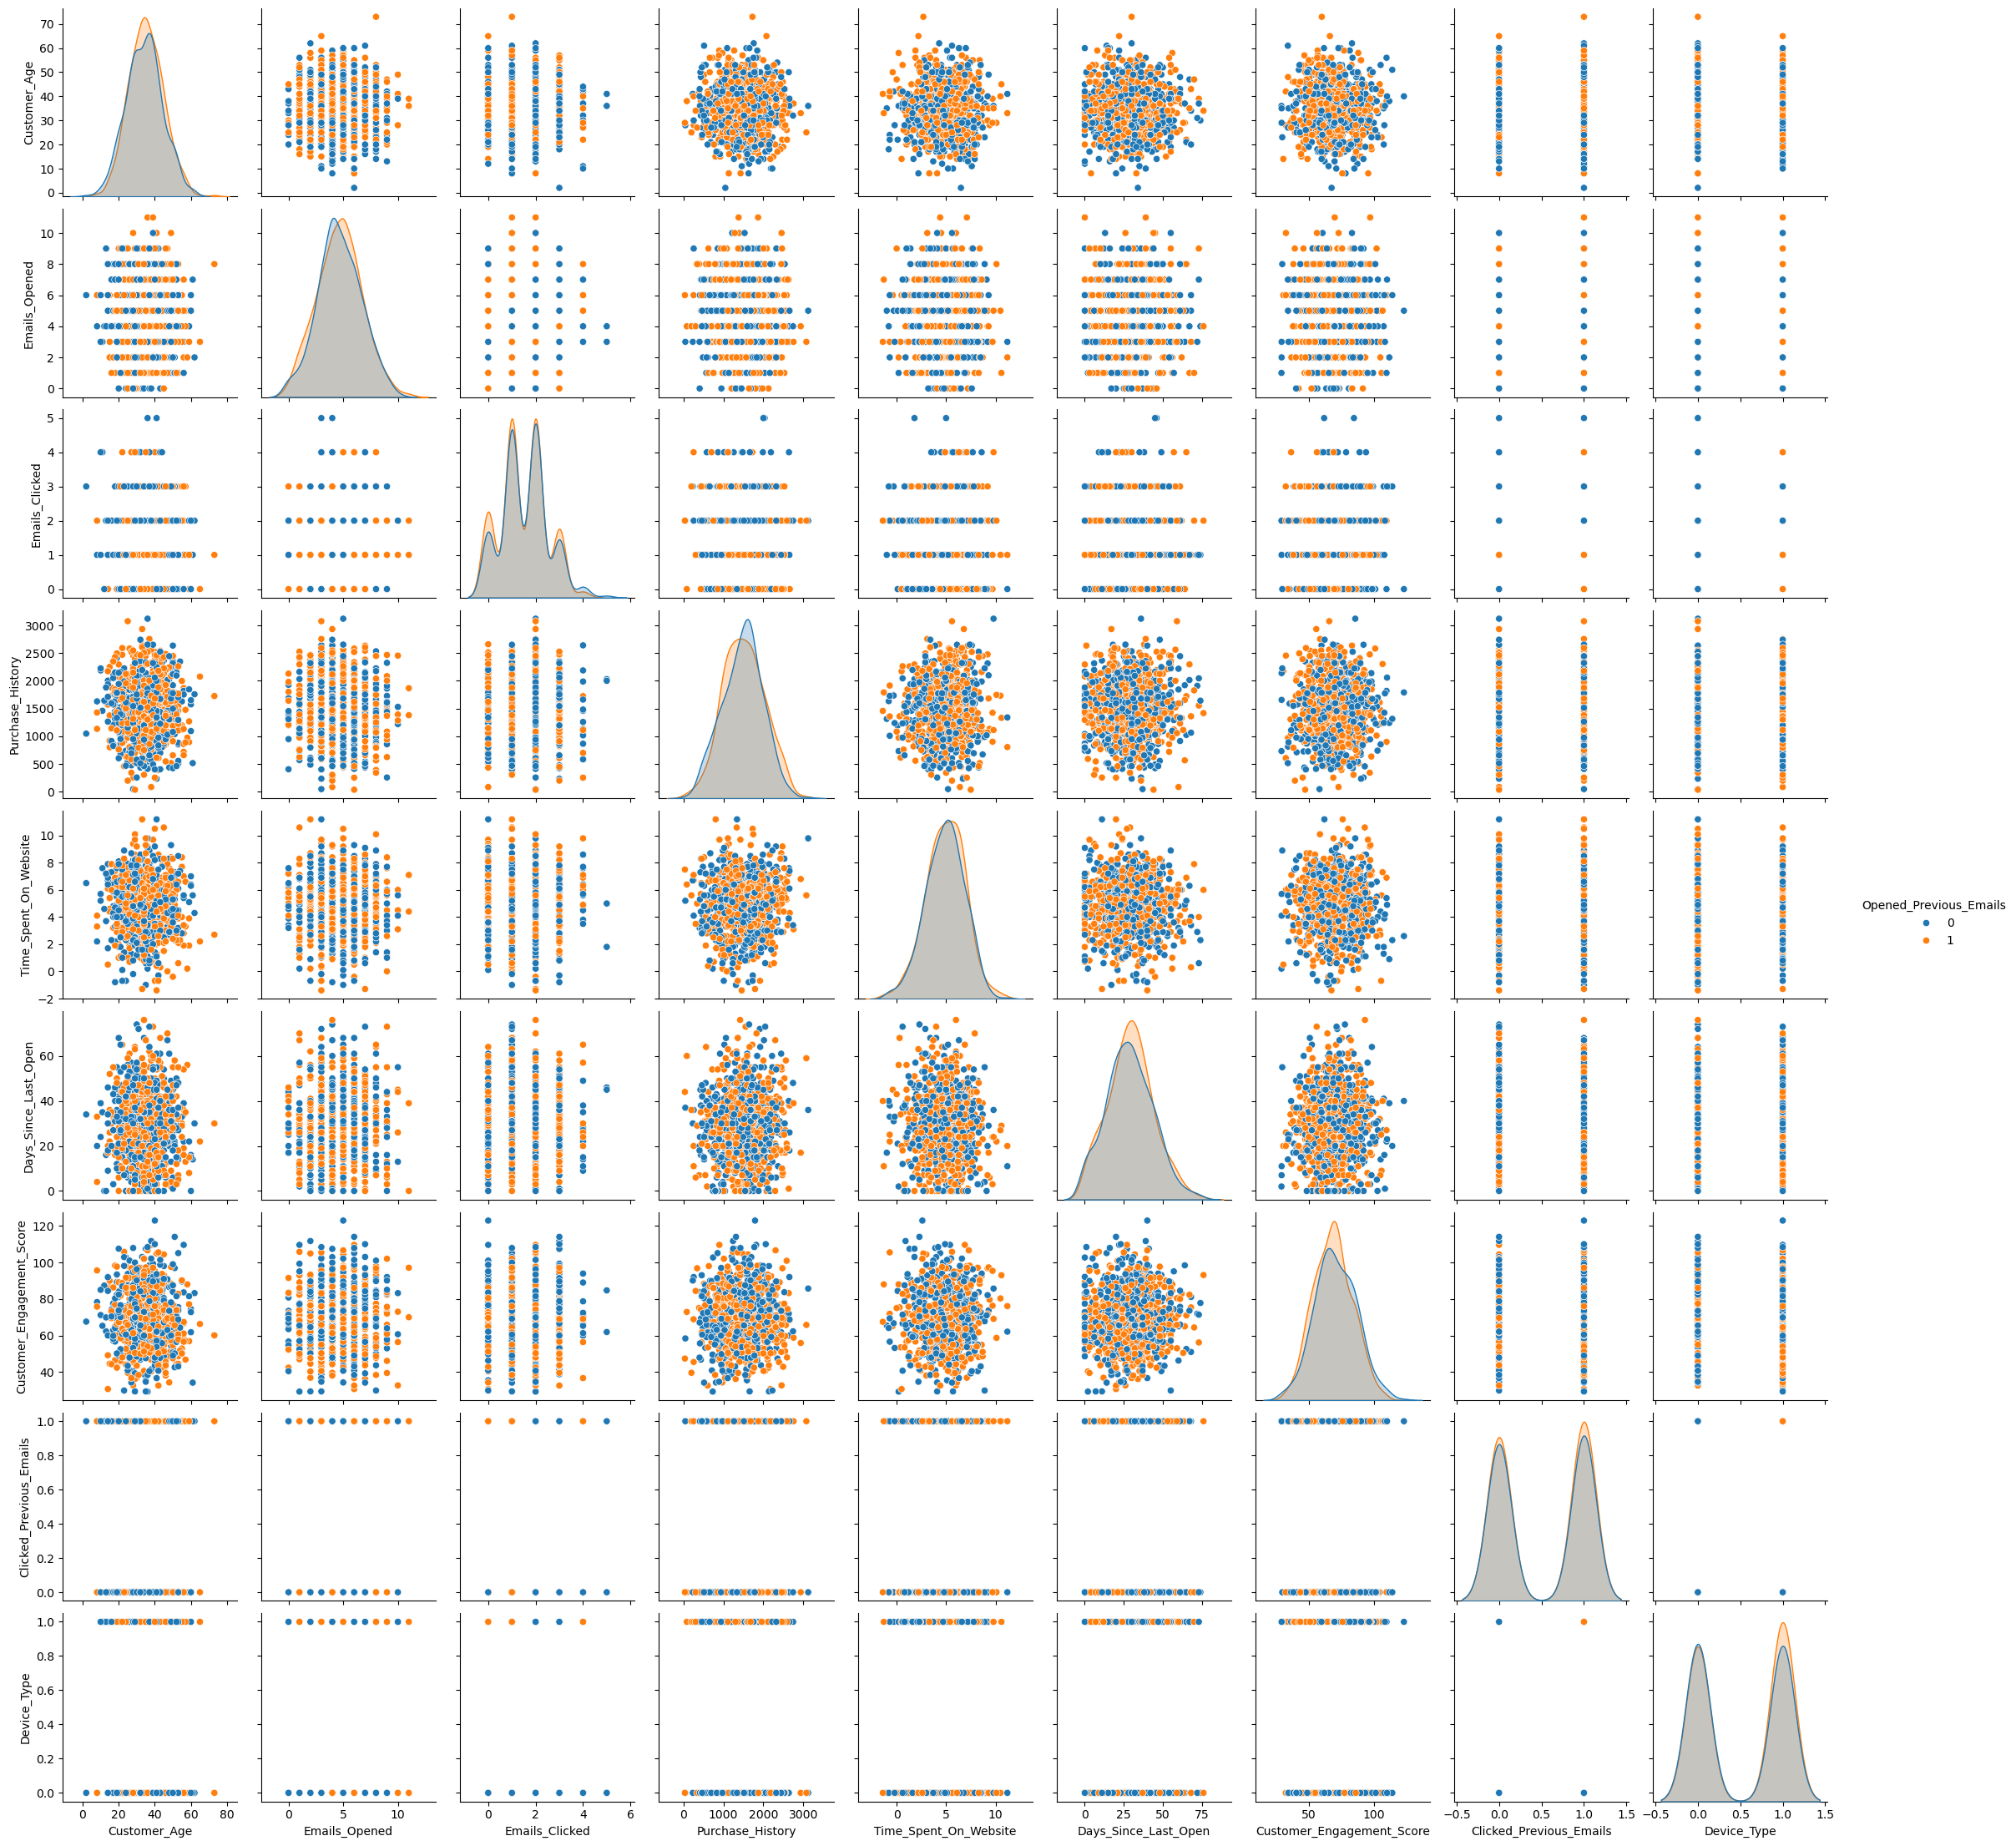

In [75]:
# Pairplot to visualize relationships between features
sns.pairplot(df,hue='Opened_Previous_Emails')
plt.show()

In [78]:
corr = df.corr()
corr

Customer_Age  Emails_Opened  Emails_Clicked  \
Customer_Age                   1.000000      -0.038190        0.022708   
Emails_Opened                 -0.038190       1.000000       -0.002995   
Emails_Clicked                 0.022708      -0.002995        1.000000   
Purchase_History              -0.013905      -0.050417        0.009365   
Time_Spent_On_Website         -0.031188      -0.011481        0.028248   
Days_Since_Last_Open          -0.006064       0.034848       -0.000367   
Customer_Engagement_Score     -0.032655      -0.007859       -0.029913   
Opened_Previous_Emails         0.053371      -0.001497       -0.037671   
Clicked_Previous_Emails       -0.018828       0.000227        0.033613   
Device_Type                   -0.047298      -0.014073       -0.044017   

                           Purchase_History  Time_Spent_On_Website  \
Customer_Age                      -0.013905              -0.031188   
Emails_Opened                     -0.050417              -0.011481   
Emails_Clicked                     0.009365               0.028248   
Purchase_History                   1.000000               0.019669   
Time_Spent_On_Website              0.019669               1.000000   
Days_Since_Last_Open               0.032327              -0.045040   
Customer_Engagement_Score          0.011469               0.003298   
Opened_Previous_Emails             0.037290               0.014898   
Clicked_Previous_Emails           -0.035634               0.021550   
Device_Type                        0.010106               0.019432   

                           Days_Since_Last_Open  Customer_Engagement_Score  \
Customer_Age                          -0.006064                  -0.032655   
Emails_Opened                          0.034848                  -0.007859   
Emails_Clicked                        -0.000367                  -0.029913   
Purchase_History                       0.032327                   0.011469   
Time_Spent_On_Website                 -0.045040                   0.003298   
Days_Since_Last_Open                   1.000000                   0.014786   
Customer_Engagement_Score              0.014786                   1.000000   
Opened_Previous_Emails                 0.022678                  -0.071167   
Clicked_Previous_Emails               -0.033436                  -0.036639   
Device_Type                           -0.021128                  -0.060078   

                           Opened_Previous_Emails  Clicked_Previous_Emails  \
Customer_Age                             0.053371                -0.018828   
Emails_Opened                           -0.001497                 0.000227   
Emails_Clicked                          -0.037671                 0.033613   
Purchase_History                         0.037290                -0.035634   
Time_Spent_On_Website                    0.014898                 0.021550   
Days_Since_Last_Open                     0.022678                -0.033436   
Customer_Engagement_Score               -0.071167                -0.036639   
Opened_Previous_Emails                   1.000000                 0.009073   
Clicked_Previous_Emails                  0.009073                 1.000000   
Device_Type                              0.039152                -0.039272   

                           Device_Type  
Customer_Age                 -0.047298  
Emails_Opened                -0.014073  
Emails_Clicked               -0.044017  
Purchase_History              0.010106  
Time_Spent_On_Website         0.019432  
Days_Since_Last_Open         -0.021128  
Customer_Engagement_Score    -0.060078  
Opened_Previous_Emails        0.039152  
Clicked_Previous_Emails      -0.039272  
Device_Type                   1.000000

In [81]:
# correlation Analysis
high_corr= corr[abs(corr)>0.5]
high_corr

Customer_Age  Emails_Opened  Emails_Clicked  \
Customer_Age                        1.0            NaN             NaN   
Emails_Opened                       NaN            1.0             NaN   
Emails_Clicked                      NaN            NaN             1.0   
Purchase_History                    NaN            NaN             NaN   
Time_Spent_On_Website               NaN            NaN             NaN   
Days_Since_Last_Open                NaN            NaN             NaN   
Customer_Engagement_Score           NaN            NaN             NaN   
Opened_Previous_Emails              NaN            NaN             NaN   
Clicked_Previous_Emails             NaN            NaN             NaN   
Device_Type                         NaN            NaN             NaN   

                           Purchase_History  Time_Spent_On_Website  \
Customer_Age                            NaN                    NaN   
Emails_Opened                           NaN                    NaN   
Emails_Clicked                          NaN                    NaN   
Purchase_History                        1.0                    NaN   
Time_Spent_On_Website                   NaN                    1.0   
Days_Since_Last_Open                    NaN                    NaN   
Customer_Engagement_Score               NaN                    NaN   
Opened_Previous_Emails                  NaN                    NaN   
Clicked_Previous_Emails                 NaN                    NaN   
Device_Type                             NaN                    NaN   

                           Days_Since_Last_Open  Customer_Engagement_Score  \
Customer_Age                                NaN                        NaN   
Emails_Opened                               NaN                        NaN   
Emails_Clicked                              NaN                        NaN   
Purchase_History                            NaN                        NaN   
Time_Spent_On_Website                       NaN                        NaN   
Days_Since_Last_Open                        1.0                        NaN   
Customer_Engagement_Score                   NaN                        1.0   
Opened_Previous_Emails                      NaN                        NaN   
Clicked_Previous_Emails                     NaN                        NaN   
Device_Type                                 NaN                        NaN   

                           Opened_Previous_Emails  Clicked_Previous_Emails  \
Customer_Age                                  NaN                      NaN   
Emails_Opened                                 NaN                      NaN   
Emails_Clicked                                NaN                      NaN   
Purchase_History                              NaN                      NaN   
Time_Spent_On_Website                         NaN                      NaN   
Days_Since_Last_Open                          NaN                      NaN   
Customer_Engagement_Score                     NaN                      NaN   
Opened_Previous_Emails                        1.0                      NaN   
Clicked_Previous_Emails                       NaN                      1.0   
Device_Type                                   NaN                      NaN   

                           Device_Type  
Customer_Age                       NaN  
Emails_Opened                      NaN  
Emails_Clicked                     NaN  
Purchase_History                   NaN  
Time_Spent_On_Website              NaN  
Days_Since_Last_Open               NaN  
Customer_Engagement_Score          NaN  
Opened_Previous_Emails             NaN  
Clicked_Previous_Emails            NaN  
Device_Type                        1.0

In [83]:
# Visualizations for Feature Relationships

In [85]:
# a.Target Variable Distribution

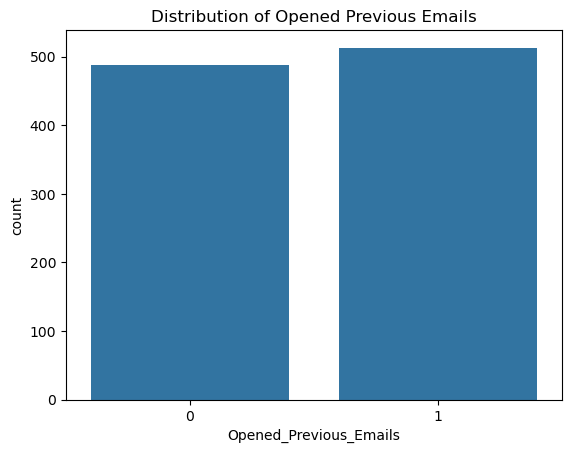

In [87]:
sns.countplot(x='Opened_Previous_Emails', data=df)
plt.title("Distribution of Opened Previous Emails")
plt.show()

In [88]:
# b.Feature Correlation with Target

Correlation with Target Variable: Opened_Previous_Emails       1.000000
Customer_Age                 0.053371
Device_Type                  0.039152
Purchase_History             0.037290
Days_Since_Last_Open         0.022678
Time_Spent_On_Website        0.014898
Clicked_Previous_Emails      0.009073
Emails_Opened               -0.001497
Emails_Clicked              -0.037671
Customer_Engagement_Score   -0.071167
Name: Opened_Previous_Emails, dtype: float64


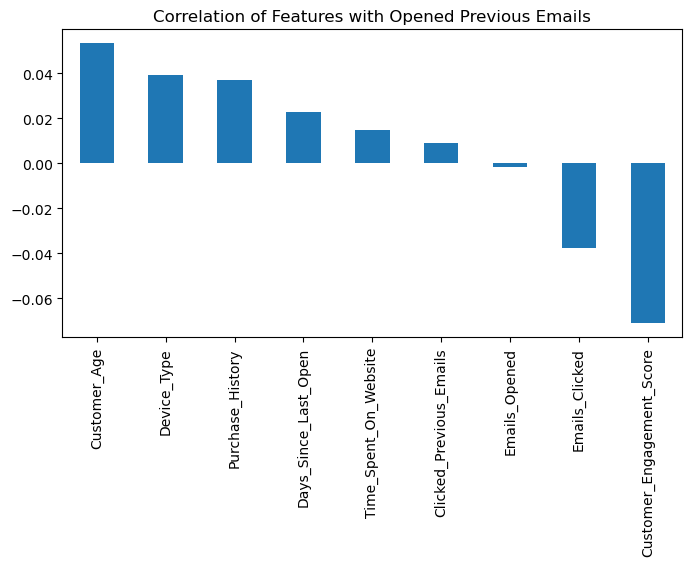

In [89]:
# Calculate correlation of features with the target variable
correlation_with_target = df.corr()['Opened_Previous_Emails'].sort_values(ascending=False)
print("Correlation with Target Variable:", correlation_with_target)

correlation_with_target.drop('Opened_Previous_Emails').plot(kind='bar', figsize=(8, 4))
plt.title("Correlation of Features with Opened Previous Emails")
plt.show()

In [90]:
# Advanced Visualization

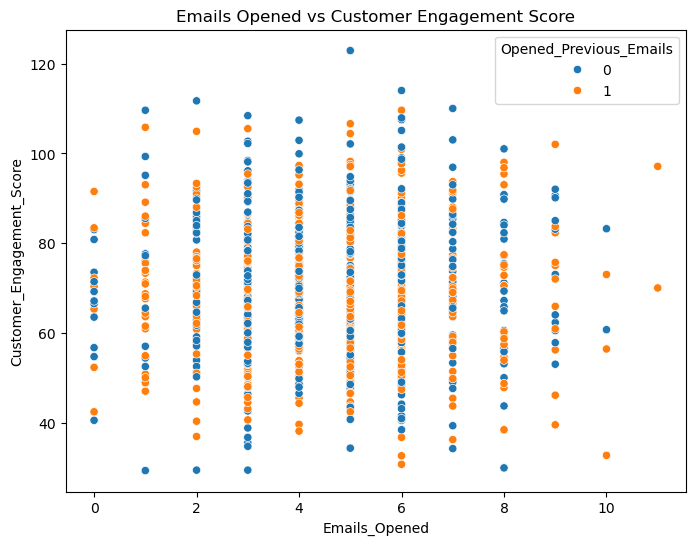

In [93]:
# Plot Emails_Opened vs. Customer_Engagement_Score and color by Opened_Previous_Emails
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Emails_Opened', y='Customer_Engagement_Score', hue='Opened_Previous_Emails', data=df)
plt.title("Emails Opened vs Customer Engagement Score")
plt.show()

In [94]:
# detect outliers separately using IQR

In [95]:
# For Customer Age
Q1A= df['Customer_Age'].quantile(0.25)
Q3A=df['Customer_Age'].quantile(0.75)
IQRA=Q3A-Q1A
print(Q1A,Q3A,IQRA)

28.0 41.0 13.0


In [101]:
lower_extremeA=Q1A-1.5*IQRA
upper_extremeA=Q3A+1.5*IQRA
print(lower_extremeA,upper_extremeA)

8.5 60.5


In [103]:
df_age_outliers= df[(df['Customer_Age']<lower_extremeA) | (df['Customer_Age']>upper_extremeA)]
df_age_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
74              8              6               1            1133.5   
179            62              2               2            1757.8   
209            73              8               1            1725.6   
262             2              6               3            1047.7   
478            65              3               0            2076.8   
646             8              4               1            1629.3   
668             8              6               2            1428.9   
755            61              7               1             515.5   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
74                     4.1                    33                       95.6   
179                    4.3                    30                       83.2   
209                    2.7                    30                       60.1   
262                    6.5                    34                       67.6   
478                    2.2                    22                       66.3   
646                    2.2                    20                       78.3   
668                    3.3                     4                       75.8   
755                    5.6                    14                       34.2   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
74                        1                        0            0  
179                       0                        1            0  
209                       1                        1            0  
262                       0                        1            0  
478                       1                        0            1  
646                       0                        1            0  
668                       1                        1            0  
755                       0                        1            0

In [105]:
df_age_outliers.shape

(8, 10)

In [107]:
dfA_no_outliers=df[(df['Customer_Age']>=lower_extremeA) & (df['Customer_Age']<=upper_extremeA)]
dfA_no_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
995            32              7               2            1514.2   
996            52              4               2             461.1   
997            41              3               0            1339.9   
998            29              4               2            2321.7   
999            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
995                    4.9                    32                       65.5   
996                    6.4                    47                       81.5   
997                   11.2                    11                       62.1   
998                    6.6                    37                       69.9   
999                    3.3                    12                       76.0   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                         0                        1            1  
1                         1                        0            1  
2                         0                        0            1  
3                         0                        1            0  
4                         0                        0            1  
..                      ...                      ...          ...  
995                       0                        1            0  
996                       0                        1            1  
997                       0                        0            0  
998                       0                        1            1  
999                       1                        1            1  

[992 rows x 10 columns]

In [109]:
# For Emails_Opened
Q1O= df['Emails_Opened'].quantile(0.25)
Q3O=df['Emails_Opened'].quantile(0.75)
IQRO=Q3O-Q1O
print(Q1O,Q3O,IQRO)

3.0 6.0 3.0


In [111]:
lower_extremeO=Q1O-1.5*IQRO
upper_extremeO=Q3O+1.5*IQRO
print(lower_extremeO,upper_extremeO)

-1.5 10.5


In [113]:
df_O_outliers= df[(df['Emails_Opened']<lower_extremeO) | (df['Emails_Opened']>upper_extremeO)]
df_O_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
615            36             11               2            1867.3   
957            39             11               1            1380.2   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
615                    4.4                     0                       70.0   
957                    7.1                    39                       97.1   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
615                       1                        1            1  
957                       1                        1            0

In [115]:
dfO_no_outliers=df[(df['Emails_Opened']>=lower_extremeO) & (df['Emails_Opened']<=upper_extremeO)]
dfO_no_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
995            32              7               2            1514.2   
996            52              4               2             461.1   
997            41              3               0            1339.9   
998            29              4               2            2321.7   
999            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
995                    4.9                    32                       65.5   
996                    6.4                    47                       81.5   
997                   11.2                    11                       62.1   
998                    6.6                    37                       69.9   
999                    3.3                    12                       76.0   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                         0                        1            1  
1                         1                        0            1  
2                         0                        0            1  
3                         0                        1            0  
4                         0                        0            1  
..                      ...                      ...          ...  
995                       0                        1            0  
996                       0                        1            1  
997                       0                        0            0  
998                       0                        1            1  
999                       1                        1            1  

[998 rows x 10 columns]

In [117]:
# For Emails_Clicked
Q1C= df['Emails_Clicked'].quantile(0.25)
Q3C=df['Emails_Clicked'].quantile(0.75)
IQRC=Q3C-Q1C
print(Q1C,Q3C,IQRC)

1.0 2.0 1.0


In [119]:
lower_extremeC=Q1C-1.5*IQRC
upper_extremeC=Q3C+1.5*IQRC
print(lower_extremeC,upper_extremeC)

-0.5 3.5


In [121]:
df_C_outliers= df[(df['Emails_Clicked']<lower_extremeC) | (df['Emails_Clicked']>upper_extremeC)]
df_C_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
35             22              8               4            1723.4   
120            42              7               4            1258.2   
175            43              4               4            1123.8   
178            32              3               4            1987.7   
192            37              3               4            2640.8   
218            30              3               4            1132.3   
305            36              3               5            2030.7   
471            11              3               4            1459.6   
506            29              6               4            1661.5   
521            40              6               4             253.4   
528            37              4               4             584.2   
544            10              3               4            2188.2   
549            28              7               4            1482.1   
574            43              5               4             865.0   
702            27              6               4            1041.8   
801            29              4               4             699.9   
838            44              4               4            1016.0   
895            41              4               5            2000.8   
989            35              5               4            1112.7   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
35                     6.9                    65                       71.0   
120                    3.8                     9                       68.3   
175                    6.0                    57                       66.1   
178                    8.6                    28                       93.9   
192                    7.6                    38                       59.9   
218                    5.6                    22                       66.0   
305                    1.8                    46                       84.7   
471                    7.6                    35                       65.3   
506                    6.4                    14                       89.0   
521                    7.1                    20                       68.9   
528                    4.9                    27                       70.3   
544                    5.7                    24                       71.2   
549                    4.5                    49                       78.7   
574                    3.5                    15                       72.4   
702                    6.3                    30                       36.7   
801                    4.9                    26                       56.4   
838                    7.7                    11                       61.3   
895                    5.0                    45                       61.9   
989                    9.8                    24                       69.1   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
35                        1                        1            1  
120                       0                        1            1  
175                       1                        1            0  
178                       0                        0            0  
192                       0                        0            0  
218                       0                        1            1  
305                       0                        0            0  
471                       0                        1            1  
506                       0                        0            0  
521                       1                        1            1  
528                       0                        1            0  
544                       0                        0            1  
549                       0                        1            1  
574                       0                        0            0  
702

In [123]:
df_C_no_outliers= df[(df['Emails_Clicked']>=lower_extremeC) & (df['Emails_Clicked']<=upper_extremeC)]
df_C_no_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
995            32              7               2            1514.2   
996            52              4               2             461.1   
997            41              3               0            1339.9   
998            29              4               2            2321.7   
999            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
995                    4.9                    32                       65.5   
996                    6.4                    47                       81.5   
997                   11.2                    11                       62.1   
998                    6.6                    37                       69.9   
999                    3.3                    12                       76.0   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                         0                        1            1  
1                         1                        0            1  
2                         0                        0            1  
3                         0                        1            0  
4                         0                        0            1  
..                      ...                      ...          ...  
995                       0                        1            0  
996                       0                        1            1  
997                       0                        0            0  
998                       0                        1            1  
999                       1                        1            1  

[981 rows x 10 columns]

In [125]:
# For Purchase_History	
Q1P= df['Purchase_History'].quantile(0.25)
Q3P=df['Purchase_History'].quantile(0.75)
IQRP=Q3P-Q1P
print(Q1P,Q3P,IQRP)

1131.2749999999999 1833.475 702.2


In [127]:
lower_extremeP=Q1P-1.5*IQRP
upper_extremeP=Q3P+1.5*IQRP
print(lower_extremeP,upper_extremeP)

77.97499999999968 2886.775


In [129]:
df_P_outliers= df[(df['Purchase_History']<lower_extremeP) | (df['Purchase_History']>upper_extremeP)]
df_P_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
152            28              3               2              46.5   
241            33              4               2            2934.2   
454            29              6               2              35.3   
716            36              5               2            3121.5   
982            25              3               2            3076.0   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
152                    5.2                    37                       58.4   
241                    6.8                    17                       55.9   
454                    7.5                    44                       47.4   
716                    9.8                    36                       85.7   
982                    5.6                    59                       65.8   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
152                       0                        1            0  
241                       1                        0            0  
454                       1                        0            0  
716                       0                        0            0  
982                       1                        1            0

In [131]:
df_P_no_outliers= df[(df['Purchase_History']>=lower_extremeP) & (df['Purchase_History']<=upper_extremeP)]
df_P_no_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
995            32              7               2            1514.2   
996            52              4               2             461.1   
997            41              3               0            1339.9   
998            29              4               2            2321.7   
999            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
995                    4.9                    32                       65.5   
996                    6.4                    47                       81.5   
997                   11.2                    11                       62.1   
998                    6.6                    37                       69.9   
999                    3.3                    12                       76.0   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                         0                        1            1  
1                         1                        0            1  
2                         0                        0            1  
3                         0                        1            0  
4                         0                        0            1  
..                      ...                      ...          ...  
995                       0                        1            0  
996                       0                        1            1  
997                       0                        0            0  
998                       0                        1            1  
999                       1                        1            1  

[995 rows x 10 columns]

In [133]:
# For Time_Spent_On_Website	
Q1W= df['Time_Spent_On_Website'].quantile(0.25)
Q3W=df['Time_Spent_On_Website'].quantile(0.75)
IQRW=Q3W-Q1W
print(Q1W,Q3W,IQRW)

3.6 6.3 2.6999999999999997


In [135]:
lower_extremeW=Q1W-1.5*IQRW
upper_extremeW=Q3W+1.5*IQRW
print(lower_extremeW,upper_extremeW)

-0.44999999999999973 10.35


In [137]:
df_W_outliers= df[(df['Time_Spent_On_Website']<lower_extremeW) | (df['Time_Spent_On_Website']>upper_extremeW)]
df_W_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
33             24              6               2            1008.9   
47             45              1               1            1331.9   
198            35              5               1            1313.8   
207            40              3               2            1915.1   
617            42              3               2            1357.9   
635            18              4               3            1633.4   
639            22              2               2            1728.9   
725            33              7               2            1791.4   
779            41              3               2            1457.0   
784            40              5               1            1732.2   
870            33              2               1             804.9   
997            41              3               0            1339.9   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
33                    -0.7                    38                       56.6   
47                    10.6                    29                       93.0   
198                   -1.0                    17                       65.5   
207                   -0.7                    22                       71.9   
617                   -0.7                    25                      105.5   
635                   -0.8                    40                       64.1   
639                   -0.7                    33                       69.4   
725                   -1.3                    11                       88.0   
779                   -1.4                    40                       67.5   
784                   10.5                    27                       80.3   
870                   11.2                    20                       76.1   
997                   11.2                    11                       62.1   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
33                        0                        1            0  
47                        1                        1            1  
198                       0                        1            0  
207                       1                        0            0  
617                       1                        1            0  
635                       0                        0            0  
639                       0                        1            1  
725                       1                        1            1  
779                       1                        0            0  
784                       1                        1            0  
870                       1                        1            0  
997                       0                        0            0

In [139]:
df_W_no_outliers= df[(df['Time_Spent_On_Website']>=lower_extremeW) & (df['Time_Spent_On_Website']<=upper_extremeW)]
df_W_no_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
994            24              5               1             467.5   
995            32              7               2            1514.2   
996            52              4               2             461.1   
998            29              4               2            2321.7   
999            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
994                    3.7                    42                       60.5   
995                    4.9                    32                       65.5   
996                    6.4                    47                       81.5   
998                    6.6                    37                       69.9   
999                    3.3                    12                       76.0   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                         0                        1            1  
1                         1                        0            1  
2                         0                        0            1  
3                         0                        1            0  
4                         0                        0            1  
..                      ...                      ...          ...  
994                       0                        1            0  
995                       0                        1            0  
996                       0                        1            1  
998                       0                        1            1  
999                       1                        1            1  

[988 rows x 10 columns]

In [141]:
# For Days_Since_Last_Open
Q1D= df['Days_Since_Last_Open'].quantile(0.25)
Q3D=df['Days_Since_Last_Open'].quantile(0.75)
IQRD=Q3D-Q1D
print(Q1D,Q3D,IQRD)

19.0 39.0 20.0


In [143]:
lower_extremeD=Q1D-1.5*IQRD
upper_extremeD=Q3D+1.5*IQRD
print(lower_extremeD,upper_extremeD)

-11.0 69.0


In [145]:
df_D_outliers= df[(df['Days_Since_Last_Open']<lower_extremeD) | (df['Days_Since_Last_Open']>upper_extremeD)]
df_D_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
157            39              9               1            1554.7   
224            30              4               1            1641.9   
673            31              3               1            1910.1   
796            34              4               2            1417.8   
808            47              1               2            1827.5   
846            37              7               1            2045.4   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
157                    4.0                    73                       56.2   
224                    2.3                    74                       77.8   
673                    2.9                    72                       71.9   
796                    6.0                    76                       93.1   
808                    7.9                    70                       64.4   
846                    0.6                    73                       71.4   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
157                       1                        0            0  
224                       0                        0            0  
673                       0                        0            0  
796                       1                        1            0  
808                       1                        0            1  
846                       0                        0            1

In [147]:
df_D_no_outliers = df[(df['Days_Since_Last_Open']>=lower_extremeD) & (df['Days_Since_Last_Open']<=upper_extremeD)]
df_D_no_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
995            32              7               2            1514.2   
996            52              4               2             461.1   
997            41              3               0            1339.9   
998            29              4               2            2321.7   
999            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
995                    4.9                    32                       65.5   
996                    6.4                    47                       81.5   
997                   11.2                    11                       62.1   
998                    6.6                    37                       69.9   
999                    3.3                    12                       76.0   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                         0                        1            1  
1                         1                        0            1  
2                         0                        0            1  
3                         0                        1            0  
4                         0                        0            1  
..                      ...                      ...          ...  
995                       0                        1            0  
996                       0                        1            1  
997                       0                        0            0  
998                       0                        1            1  
999                       1                        1            1  

[994 rows x 10 columns]

In [149]:
# For Customer_Engagement_Score	
Q1E= df['Customer_Engagement_Score'].quantile(0.25)
Q3E=df['Customer_Engagement_Score'].quantile(0.75)
IQRE=Q3E-Q1E
print(Q1E,Q3E,IQRE)

58.7 80.5 21.799999999999997


In [151]:
lower_extremeE=Q1E-1.5*IQRE
upper_extremeE=Q3E+1.5*IQRE
print(lower_extremeE,upper_extremeE)

26.000000000000007 113.19999999999999


In [153]:
df_E_outliers= df[(df['Customer_Engagement_Score']<lower_extremeE) | (df['Customer_Engagement_Score']>upper_extremeE)]
df_E_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
738            51              6               3            1314.7   
891            40              5               0            1791.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
738                    2.3                    20                      114.0   
891                    2.6                    40                      122.9   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
738                       0                        0            0  
891                       0                        1            1

In [155]:
df_E_no_outliers= df[(df['Customer_Engagement_Score']>=lower_extremeE) & (df['Customer_Engagement_Score']<=upper_extremeE)]
df_E_no_outliers

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
995            32              7               2            1514.2   
996            52              4               2             461.1   
997            41              3               0            1339.9   
998            29              4               2            2321.7   
999            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
995                    4.9                    32                       65.5   
996                    6.4                    47                       81.5   
997                   11.2                    11                       62.1   
998                    6.6                    37                       69.9   
999                    3.3                    12                       76.0   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                         0                        1            1  
1                         1                        0            1  
2                         0                        0            1  
3                         0                        1            0  
4                         0                        0            1  
..                      ...                      ...          ...  
995                       0                        1            0  
996                       0                        1            1  
997                       0                        0            0  
998                       0                        1            1  
999                       1                        1            1  

[998 rows x 10 columns]

In [157]:
# For Opened_Previous_Emails	
Q1OP= df['Opened_Previous_Emails'].quantile(0.25)
Q3OP=df['Opened_Previous_Emails'].quantile(0.75)
IQROP=Q3OP-Q1OP
print(Q1OP,Q3OP,IQROP)

0.0 1.0 1.0


In [159]:
lower_extremeOP=Q1OP-1.5*IQROP
upper_extremeOP=Q3OP+1.5*IQROP
print(lower_extremeOP,upper_extremeOP)

-1.5 2.5


In [161]:
df_OP_outliers= df[(df['Opened_Previous_Emails']<lower_extremeOP) | (df['Opened_Previous_Emails']>upper_extremeOP)]
df_OP_outliers

Empty DataFrame
Columns: [Customer_Age, Emails_Opened, Emails_Clicked, Purchase_History, Time_Spent_On_Website, Days_Since_Last_Open, Customer_Engagement_Score, Opened_Previous_Emails, Clicked_Previous_Emails, Device_Type]
Index: []

In [163]:
# no outliers in Opened_Previous_Emails

In [165]:
# For Clicked_Previous_Emails	
Q1CP= df['Clicked_Previous_Emails'].quantile(0.25)
Q3CP=df['Clicked_Previous_Emails'].quantile(0.75)
IQRCP=Q3CP-Q1CP
print(Q1CP,Q3CP,IQRCP)

0.0 1.0 1.0


In [167]:
lower_extremeCP=Q1CP-1.5*IQRCP
upper_extremeCP=Q3CP+1.5*IQRCP
print(lower_extremeCP,upper_extremeCP)

-1.5 2.5


In [169]:
df_CP_outliers= df[(df['Clicked_Previous_Emails']<lower_extremeCP) | (df['Clicked_Previous_Emails']>upper_extremeCP)]
df_CP_outliers

Empty DataFrame
Columns: [Customer_Age, Emails_Opened, Emails_Clicked, Purchase_History, Time_Spent_On_Website, Days_Since_Last_Open, Customer_Engagement_Score, Opened_Previous_Emails, Clicked_Previous_Emails, Device_Type]
Index: []

In [171]:
# no outliers in Clicked_Previous_Emails

In [173]:
# For Device_Type
Q1T= df['Device_Type'].quantile(0.25)
Q3T=df['Device_Type'].quantile(0.75)
IQRT=Q3T-Q1T
print(Q1T,Q3T,IQRT)

0.0 1.0 1.0


In [175]:
lower_extremeT=Q1T-1.5*IQRT
upper_extremeT=Q3T+1.5*IQRT
print(lower_extremeT,upper_extremeT)

-1.5 2.5


In [177]:
df_T_outliers= df[(df['Device_Type']<lower_extremeT) | (df['Device_Type']>upper_extremeT)]
df_T_outliers

Empty DataFrame
Columns: [Customer_Age, Emails_Opened, Emails_Clicked, Purchase_History, Time_Spent_On_Website, Days_Since_Last_Open, Customer_Engagement_Score, Opened_Previous_Emails, Clicked_Previous_Emails, Device_Type]
Index: []

In [179]:
# no outliers in Device_Type

In [181]:
# Detect and Remove Outliers together Using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        if df[col].dtype != 'object':  # Only process numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply to all numerical columns
cleaned_data = remove_outliers_iqr(df, df.columns)

In [183]:
cleaned_data

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
994            24              5               1             467.5   
995            32              7               2            1514.2   
996            52              4               2             461.1   
998            29              4               2            2321.7   
999            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
994                    3.7                    42                       60.5   
995                    4.9                    32                       65.5   
996                    6.4                    47                       81.5   
998                    6.6                    37                       69.9   
999                    3.3                    12                       76.0   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                         0                        1            1  
1                         1                        0            1  
2                         0                        0            1  
3                         0                        1            0  
4                         0                        0            1  
..                      ...                      ...          ...  
994                       0                        1            0  
995                       0                        1            0  
996                       0                        1            1  
998                       0                        1            1  
999                       1                        1            1  

[945 rows x 10 columns]

In [185]:
cleaned_data = cleaned_data.reset_index().drop(columns='index')
cleaned_data

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
940            24              5               1             467.5   
941            32              7               2            1514.2   
942            52              4               2             461.1   
943            29              4               2            2321.7   
944            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
940                    3.7                    42                       60.5   
941                    4.9                    32                       65.5   
942                    6.4                    47                       81.5   
943                    6.6                    37                       69.9   
944                    3.3                    12                       76.0   

     Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                         0                        1            1  
1                         1                        0            1  
2                         0                        0            1  
3                         0                        1            0  
4                         0                        0            1  
..                      ...                      ...          ...  
940                       0                        1            0  
941                       0                        1            0  
942                       0                        1            1  
943                       0                        1            1  
944                       1                        1            1  

[945 rows x 10 columns]

In [187]:
target1 = cleaned_data[['Opened_Previous_Emails']]
target1

Opened_Previous_Emails
0                         0
1                         1
2                         0
3                         0
4                         0
..                      ...
940                       0
941                       0
942                       0
943                       0
944                       1

[945 rows x 1 columns]

In [189]:
features1 = cleaned_data.drop(columns='Opened_Previous_Emails')
features1

Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0              39              7               1             546.1   
1              33              6               1            1069.8   
2              41              5               1            1293.2   
3              50              3               1            2443.8   
4              32              6               0            1778.3   
..            ...            ...             ...               ...   
940            24              5               1             467.5   
941            32              7               2            1514.2   
942            52              4               2             461.1   
943            29              4               2            2321.7   
944            40              3               1            1680.3   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                      3.3                    23                       53.3   
1                      4.9                    23                       60.5   
2                      5.0                     3                       55.9   
3                      5.9                    25                       61.8   
4                      2.3                    40                       66.8   
..                     ...                   ...                        ...   
940                    3.7                    42                       60.5   
941                    4.9                    32                       65.5   
942                    6.4                    47                       81.5   
943                    6.6                    37                       69.9   
944                    3.3                    12                       76.0   

     Clicked_Previous_Emails  Device_Type  
0                          1            1  
1                          0            1  
2                          0            1  
3                          1            0  
4                          0            1  
..                       ...          ...  
940                        1            0  
941                        1            0  
942                        1            1  
943                        1            1  
944                        1            1  

[945 rows x 9 columns]

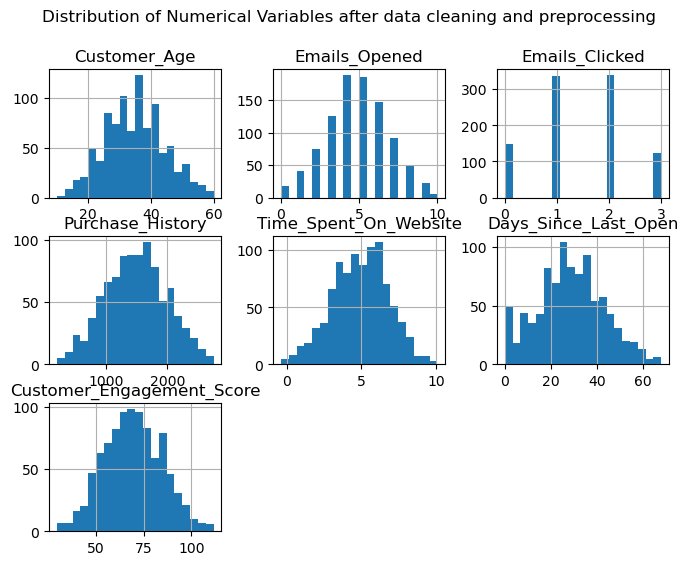

In [191]:
# Histograms for numerical variables after data cleaning and preprocessing
numerical_cols1 = ['Customer_Age', 'Emails_Opened', 'Emails_Clicked', 'Purchase_History',
                  'Time_Spent_On_Website', 'Days_Since_Last_Open', 'Customer_Engagement_Score']

cleaned_data[numerical_cols1].hist(bins=20, figsize=(8, 6))
plt.suptitle("Distribution of Numerical Variables after data cleaning and preprocessing")
plt.show()

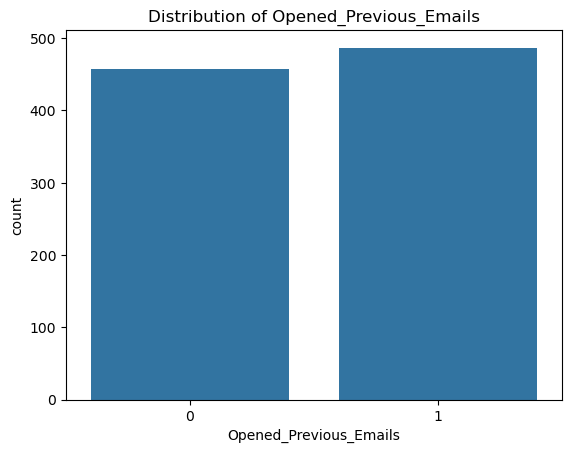

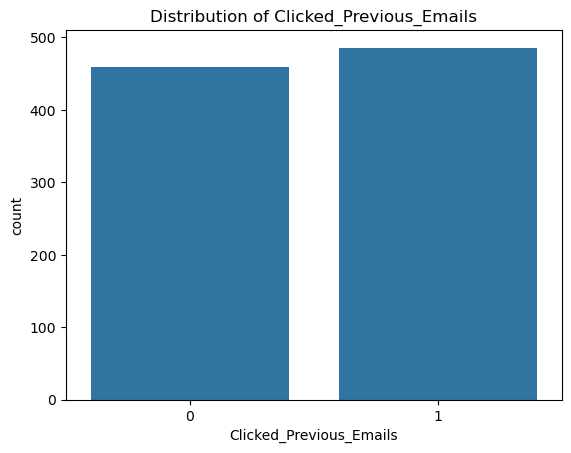

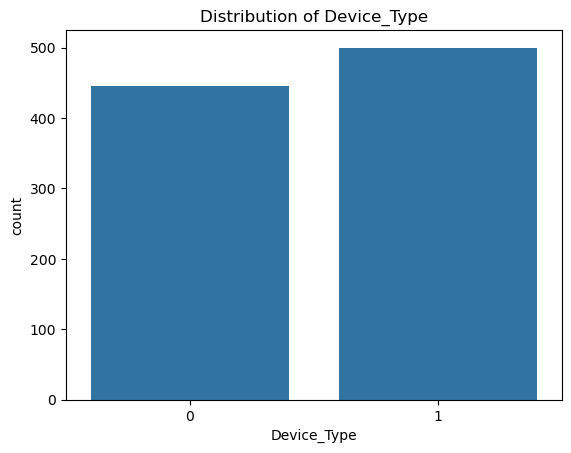

In [192]:
# Bar plots for binary variables after data cleaning and preprocessing
categorical_cols = ['Opened_Previous_Emails', 'Clicked_Previous_Emails', 'Device_Type']

for col in categorical_cols:
    sns.countplot(x=col, data=cleaned_data)
    plt.title(f"Distribution of {col}")
    plt.show()

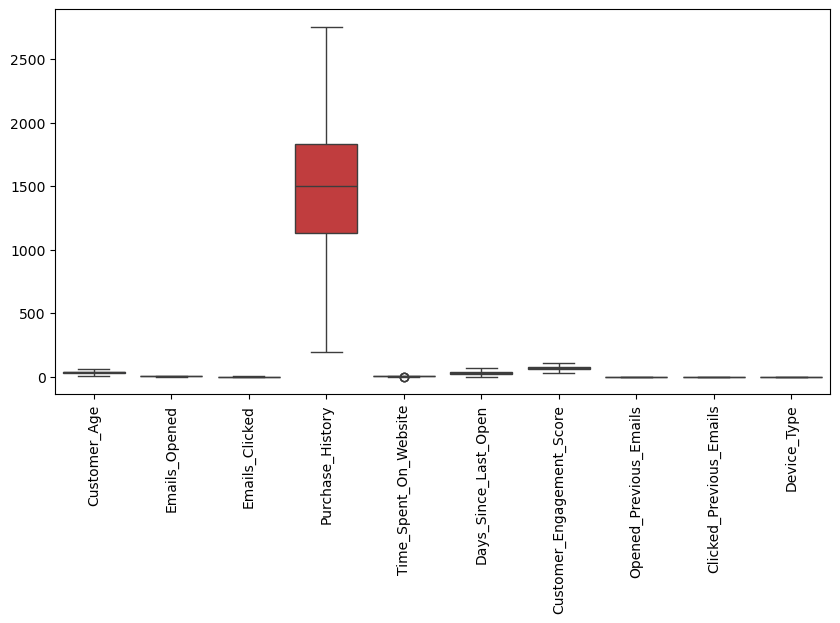

In [193]:
# Boxplots after data cleaning and preprocessing
plt.figure(figsize=(10,5))
sns.boxplot(data=cleaned_data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Pairplot to visualize relationships between features after cleaning and preprocessing the data
sns.pairplot(cleaned_data,hue='Opened_Previous_Emails')
plt.show()

In [ ]:
# Heatmap to check correlations after data cleaning and preprocessing
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# 2. Model Building and Evaluation

In [ ]:
# model building is a crucial step that involves transforming data into actionable predictions and insights.

In [ ]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# splitting into training and testing data
x_train,x_test,y_train,y_test=train_test_split(features1,target1,train_size=0.80,random_state=100)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
# to check the balancing of training target
y_train.value_counts()

In [ ]:
# Standardizing the data

In [ ]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [528]:
# Scaling features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

#### model building using Logistic regression

In [531]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression

In [532]:
log_model = LogisticRegression()

In [533]:
# Train the model 
log_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [537]:
y_pred1 = log_model.predict(x_test_scaled)
y_pred1

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [539]:
y_pred1_prob = log_model.predict_proba(x_test_scaled)[:, 1]
y_pred1_prob

array([0.52147152, 0.48182838, 0.57574088, 0.53534993, 0.60003382,
       0.51314903, 0.59928856, 0.43690395, 0.43581202, 0.48881394,
       0.4653965 , 0.48551636, 0.49958467, 0.52654263, 0.46884456,
       0.53078431, 0.49047506, 0.59256073, 0.52340442, 0.52033853,
       0.57809274, 0.52643137, 0.46703401, 0.51597779, 0.59871721,
       0.47545383, 0.46994626, 0.47422743, 0.47731458, 0.52747338,
       0.50233499, 0.55440004, 0.46230497, 0.49243483, 0.52800207,
       0.51432438, 0.53833174, 0.42966984, 0.52429037, 0.55135058,
       0.56097896, 0.54116905, 0.59374311, 0.50948414, 0.50757819,
       0.56065494, 0.51887427, 0.5397475 , 0.49690362, 0.51566013,
       0.48159487, 0.48581615, 0.52898335, 0.45510568, 0.58190225,
       0.46179514, 0.6142768 , 0.4498231 , 0.50802661, 0.44608148,
       0.5857239 , 0.4472312 , 0.47110774, 0.53717621, 0.50651984,
       0.59912212, 0.54920584, 0.56214718, 0.54650864, 0.52276751,
       0.59181669, 0.505057  , 0.53473517, 0.48252225, 0.44505

In [541]:
from sklearn.metrics import accuracy_score

In [543]:
# Evaluate the logistic model
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy of logistic model:", accuracy1)

Accuracy of logistic model: 0.5396825396825397


In [545]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [547]:
# Confusion matrix of logistic model
cm1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix of logi. model:\n", cm1)

Confusion Matrix of logi. model:
 [[37 55]
 [32 65]]


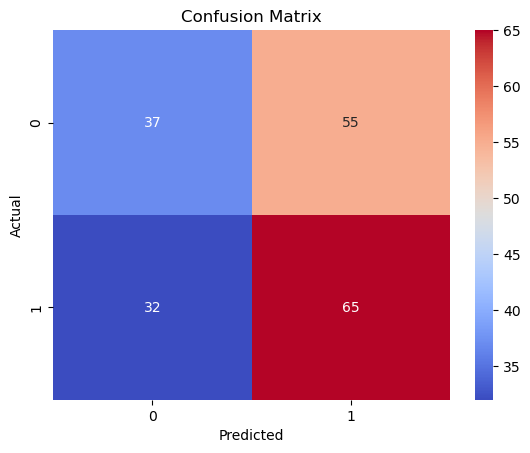

In [549]:
sns.heatmap(cm1,annot=True,cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');

In [550]:
# Classification report of logi.model
print("Classification Report of logi.model:\n", classification_report(y_test, y_pred1))

Classification Report of logi.model:
               precision    recall  f1-score   support

           0       0.54      0.40      0.46        92
           1       0.54      0.67      0.60        97

    accuracy                           0.54       189
   macro avg       0.54      0.54      0.53       189
weighted avg       0.54      0.54      0.53       189



In [551]:
# AUC Score of logi.model
auc1 = roc_auc_score(y_test, y_pred1_prob)
print("AUC Score of Logi.Model:", auc1)

AUC Score of Logi.Model: 0.5384356790676826


In [555]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1_prob)

In [557]:
fpr1

array([0.        , 0.        , 0.        , 0.01086957, 0.01086957,
       0.02173913, 0.02173913, 0.0326087 , 0.0326087 , 0.09782609,
       0.09782609, 0.11956522, 0.11956522, 0.13043478, 0.13043478,
       0.14130435, 0.14130435, 0.15217391, 0.15217391, 0.20652174,
       0.20652174, 0.2173913 , 0.2173913 , 0.22826087, 0.22826087,
       0.23913043, 0.23913043, 0.26086957, 0.26086957, 0.2826087 ,
       0.2826087 , 0.31521739, 0.31521739, 0.32608696, 0.32608696,
       0.33695652, 0.33695652, 0.34782609, 0.34782609, 0.35869565,
       0.35869565, 0.40217391, 0.40217391, 0.41304348, 0.41304348,
       0.44565217, 0.44565217, 0.45652174, 0.45652174, 0.4673913 ,
       0.4673913 , 0.47826087, 0.47826087, 0.48913043, 0.48913043,
       0.51086957, 0.51086957, 0.52173913, 0.52173913, 0.57608696,
       0.57608696, 0.59782609, 0.59782609, 0.64130435, 0.64130435,
       0.65217391, 0.65217391, 0.67391304, 0.67391304, 0.70652174,
       0.70652174, 0.72826087, 0.72826087, 0.7826087 , 0.78260

In [559]:
tpr1

array([0.        , 0.01030928, 0.02061856, 0.02061856, 0.03092784,
       0.03092784, 0.04123711, 0.04123711, 0.06185567, 0.06185567,
       0.07216495, 0.07216495, 0.11340206, 0.11340206, 0.15463918,
       0.15463918, 0.18556701, 0.18556701, 0.21649485, 0.21649485,
       0.22680412, 0.22680412, 0.25773196, 0.25773196, 0.26804124,
       0.26804124, 0.28865979, 0.28865979, 0.29896907, 0.29896907,
       0.30927835, 0.30927835, 0.34020619, 0.34020619, 0.36082474,
       0.36082474, 0.3814433 , 0.3814433 , 0.40206186, 0.40206186,
       0.41237113, 0.41237113, 0.44329897, 0.44329897, 0.48453608,
       0.48453608, 0.54639175, 0.54639175, 0.55670103, 0.55670103,
       0.59793814, 0.59793814, 0.60824742, 0.60824742, 0.6185567 ,
       0.6185567 , 0.62886598, 0.62886598, 0.64948454, 0.64948454,
       0.65979381, 0.65979381, 0.67010309, 0.67010309, 0.69072165,
       0.69072165, 0.71134021, 0.71134021, 0.73195876, 0.73195876,
       0.7628866 , 0.7628866 , 0.77319588, 0.77319588, 0.79381

In [561]:
 thresholds1

array([       inf, 0.62884784, 0.6162382 , 0.6142768 , 0.61211366,
       0.61051091, 0.60003382, 0.59928856, 0.59871721, 0.59206141,
       0.59181669, 0.5858634 , 0.5817105 , 0.58160618, 0.5743851 ,
       0.57216262, 0.56777218, 0.56414422, 0.56126691, 0.55719053,
       0.55440004, 0.55297264, 0.5511726 , 0.55013672, 0.54920584,
       0.54771697, 0.54742475, 0.54650864, 0.54587246, 0.54175822,
       0.54116905, 0.53847639, 0.53756649, 0.53717621, 0.53541423,
       0.53534993, 0.53473517, 0.53413383, 0.5332144 , 0.5324655 ,
       0.53216302, 0.52898335, 0.52800207, 0.52747338, 0.52624781,
       0.52429037, 0.52033853, 0.51897187, 0.51887427, 0.5163797 ,
       0.51477236, 0.51463795, 0.51432438, 0.5141289 , 0.51397236,
       0.51314903, 0.51102811, 0.50948414, 0.50802661, 0.505057  ,
       0.5049243 , 0.50233499, 0.50081694, 0.49689719, 0.49422711,
       0.49336904, 0.49047506, 0.48881394, 0.48737201, 0.48581615,
       0.48507941, 0.48252225, 0.48182838, 0.47632224, 0.47593

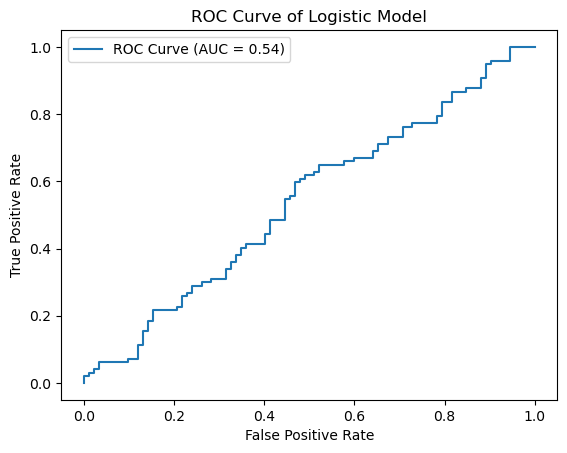

In [563]:
# Plotting ROC Curve of logistic model
plt.plot(fpr1, tpr1, label=f"ROC Curve (AUC = {auc1:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Model')
plt.legend()
plt.show()

#### Hyperparameter Tuning for logistic model

In [565]:
# using gridsearchcv
from sklearn.model_selection import GridSearchCV

In [567]:
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(x_train_scaled, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [569]:
# Training the model with best parameters
best_model1= LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
best_model1.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [570]:
# Predict on the test set
y_pred11 = best_model1.predict(x_test_scaled)
y_pred11_prob = best_model1.predict_proba(x_test_scaled)[:, 1]

In [571]:
y_pred11

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [573]:
y_pred11_prob

array([0.49317549, 0.47760906, 0.51804266, 0.5104803 , 0.53924215,
       0.53126525, 0.53180992, 0.47112421, 0.48779456, 0.49341501,
       0.46520408, 0.48596886, 0.47523446, 0.50026276, 0.46370165,
       0.50282476, 0.50292034, 0.53918308, 0.51733988, 0.50369446,
       0.54163064, 0.50040462, 0.47805722, 0.50344966, 0.54358642,
       0.47085704, 0.47188764, 0.51138223, 0.49483854, 0.51613837,
       0.49515537, 0.54042221, 0.4921335 , 0.48716657, 0.50893273,
       0.48861908, 0.50938559, 0.47123878, 0.51094349, 0.52008567,
       0.54502151, 0.50498535, 0.53699007, 0.48753789, 0.50566644,
       0.53661962, 0.5034707 , 0.53795798, 0.4838786 , 0.51911579,
       0.47344039, 0.46688396, 0.49427121, 0.47750284, 0.53653855,
       0.4841889 , 0.55598929, 0.45991993, 0.49736721, 0.47663954,
       0.53459735, 0.47806102, 0.47546752, 0.49441376, 0.498564  ,
       0.5259229 , 0.51070981, 0.51809863, 0.51836295, 0.50116286,
       0.54061791, 0.5061848 , 0.51334028, 0.47831035, 0.45059

In [577]:
# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred11)
print("Accuracy:", accuracy2)

Accuracy: 0.5608465608465608


In [579]:
# Confusion matrix
cm2 = confusion_matrix(y_test, y_pred11)
print("Confusion Matrix:\n", cm2)

Confusion Matrix:
 [[45 47]
 [36 61]]


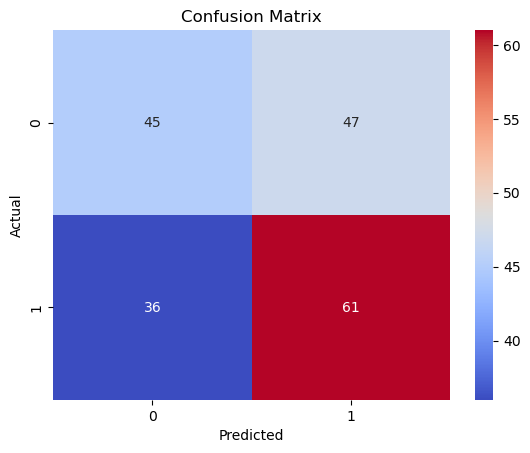

In [581]:
sns.heatmap(cm2,annot=True,cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');

In [583]:
# Classification report
print("Classification Report of Logistic Regression using Grid SearchCV:\n", classification_report(y_test, y_pred11))

Classification Report of Logistic Regression using Grid SearchCV:
               precision    recall  f1-score   support

           0       0.56      0.49      0.52        92
           1       0.56      0.63      0.60        97

    accuracy                           0.56       189
   macro avg       0.56      0.56      0.56       189
weighted avg       0.56      0.56      0.56       189



In [584]:
# AUC Score
auc2 = roc_auc_score(y_test, y_pred11_prob)
print("AUC Score:", auc2)

AUC Score: 0.5272299417301658


In [585]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred11_prob)
print(fpr2)
print(tpr2)
print(thresholds2)

[0.         0.         0.0326087  0.0326087  0.06521739 0.06521739
 0.08695652 0.08695652 0.09782609 0.09782609 0.10869565 0.10869565
 0.11956522 0.11956522 0.13043478 0.13043478 0.14130435 0.14130435
 0.17391304 0.17391304 0.20652174 0.20652174 0.2173913  0.2173913
 0.22826087 0.22826087 0.25       0.25       0.26086957 0.26086957
 0.2826087  0.2826087  0.29347826 0.29347826 0.30434783 0.30434783
 0.34782609 0.34782609 0.35869565 0.35869565 0.36956522 0.36956522
 0.38043478 0.38043478 0.39130435 0.39130435 0.41304348 0.41304348
 0.42391304 0.42391304 0.43478261 0.43478261 0.47826087 0.47826087
 0.5        0.5        0.51086957 0.51086957 0.55434783 0.55434783
 0.56521739 0.56521739 0.59782609 0.59782609 0.60869565 0.60869565
 0.61956522 0.61956522 0.63043478 0.63043478 0.66304348 0.66304348
 0.67391304 0.67391304 0.70652174 0.70652174 0.7173913  0.7173913
 0.75       0.75       0.76086957 0.76086957 0.86956522 0.86956522
 0.88043478 0.88043478 0.89130435 0.89130435 0.93478261 0.934782

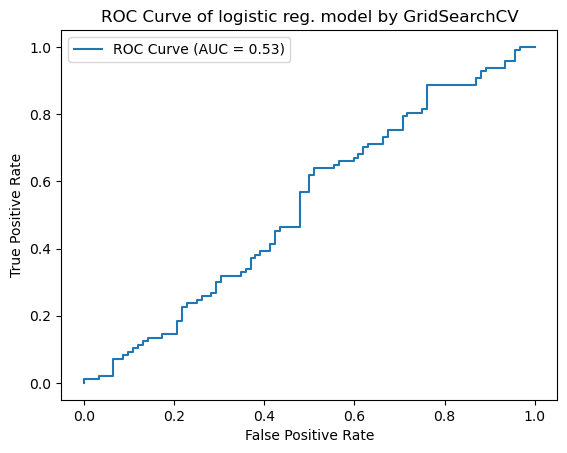

In [587]:
# ROC Curve
plt.plot(fpr2, tpr2, label=f"ROC Curve (AUC = {auc2:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of logistic reg. model by GridSearchCV')
plt.legend()
plt.show()

#### model building using decision tree 

In [592]:
# importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [593]:
# training the model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=100)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=100)

In [595]:
y_pred_dt = dt_model.predict(x_test)
y_pred_prob_dt = dt_model.predict_proba(x_test)[:, 1]

In [596]:
# in decision tree,there is no need of scaling

In [597]:
y_pred_dt 

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [598]:
y_pred_prob_dt

array([0.63580247, 0.625     , 0.53135314, 0.53135314, 0.53135314,
       0.53135314, 0.53135314, 0.42990654, 0.63580247, 0.63580247,
       0.42990654, 0.63580247, 1.        , 0.63580247, 0.42990654,
       0.53135314, 0.53135314, 0.53135314, 0.53135314, 0.53135314,
       0.53135314, 0.63580247, 1.        , 0.53135314, 0.53135314,
       0.42990654, 0.42990654, 0.53135314, 0.63580247, 0.55      ,
       0.63580247, 0.53135314, 0.63580247, 0.63580247, 0.53135314,
       1.        , 0.53135314, 0.625     , 0.55      , 0.53135314,
       0.53135314, 0.63580247, 0.53135314, 0.63580247, 0.53135314,
       0.53135314, 0.63580247, 0.53135314, 0.05882353, 0.53135314,
       0.42990654, 0.42990654, 0.63580247, 0.625     , 0.53135314,
       0.63580247, 0.53135314, 0.42990654, 0.63580247, 0.        ,
       0.53135314, 0.625     , 0.42990654, 0.63580247, 0.55      ,
       0.53135314, 0.53135314, 0.53135314, 0.53135314, 0.63580247,
       0.53135314, 0.05882353, 0.53135314, 0.42990654, 0.42990

In [601]:
# Evaluation of decision tree model
from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("AUC (Decision Tree):", roc_auc_score(y_test, y_pred_prob_dt))

Accuracy (Decision Tree): 0.5608465608465608
AUC (Decision Tree): 0.5489690721649485


In [606]:
# Confusion matrix
cm3 = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm3)

Confusion Matrix:
 [[26 66]
 [17 80]]


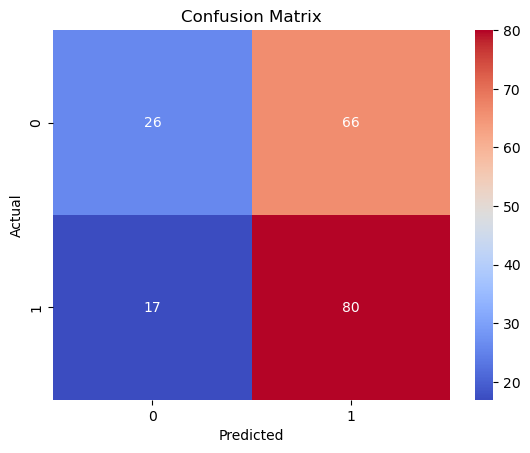

In [608]:
sns.heatmap(cm3,annot=True,cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');

In [609]:
# Classification report
print("Classification Report of Decision Tree Classifier:\n", classification_report(y_test, y_pred_dt))

Classification Report of Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.60      0.28      0.39        92
           1       0.55      0.82      0.66        97

    accuracy                           0.56       189
   macro avg       0.58      0.55      0.52       189
weighted avg       0.58      0.56      0.53       189



In [610]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob_dt)
print(fpr3)
print(tpr3)
print(thresholds3)

[0.         0.0326087  0.04347826 0.23913043 0.26086957 0.29347826
 0.7173913  0.85869565 0.88043478 0.94565217 1.        ]
[0.         0.03092784 0.04123711 0.26804124 0.30927835 0.31958763
 0.82474227 0.92783505 0.92783505 0.95876289 1.        ]
[       inf 1.         0.71428571 0.63580247 0.625      0.55
 0.53135314 0.42990654 0.25       0.05882353 0.        ]


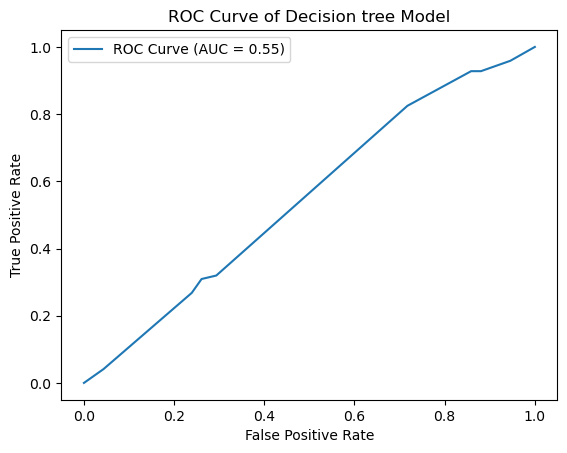

In [612]:
# ROC Curve
plt.plot(fpr3, tpr3, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob_dt):.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision tree Model')
plt.legend()
plt.show()

#### model building using XGB classifier

In [614]:
from xgboost import XGBClassifier

In [618]:
# training the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=100)
xgb_model.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=100, ...)

In [619]:
y_pred_xgb = xgb_model.predict(x_test_scaled)
y_pred_xgb

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [620]:
y_pred_prob_xgb = xgb_model.predict_proba(x_test_scaled)[:, 1]
y_pred_prob_xgb

array([0.9661026 , 0.72296786, 0.21200661, 0.12425884, 0.6721682 ,
       0.12617625, 0.33733124, 0.29738668, 0.69543386, 0.65566224,
       0.55745536, 0.9182429 , 0.9861238 , 0.8904405 , 0.3044251 ,
       0.12329324, 0.93625504, 0.6716372 , 0.5028992 , 0.66018283,
       0.90644926, 0.9315618 , 0.04977779, 0.69329864, 0.52425385,
       0.72787666, 0.1706099 , 0.45149463, 0.97757244, 0.2695586 ,
       0.6318416 , 0.10057659, 0.98952216, 0.20215707, 0.3507901 ,
       0.6459328 , 0.30692378, 0.63139486, 0.13337451, 0.7380722 ,
       0.04265123, 0.9399294 , 0.05879967, 0.04975791, 0.11497463,
       0.8208172 , 0.94572604, 0.8922392 , 0.44675997, 0.10711259,
       0.09293535, 0.72906446, 0.63484776, 0.0500415 , 0.44596672,
       0.18513146, 0.7749206 , 0.8251855 , 0.9861946 , 0.45022884,
       0.697606  , 0.3094024 , 0.81049633, 0.12107503, 0.62196195,
       0.7708173 , 0.9663856 , 0.7940844 , 0.690661  , 0.14041394,
       0.8767106 , 0.24466199, 0.18606614, 0.91340786, 0.27681

In [623]:
print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("AUC (XGBoost):", roc_auc_score(y_test, y_pred_prob_xgb))

Accuracy (XGBoost): 0.5185185185185185
AUC (XGBoost): 0.5508740475123264


In [628]:
# Confusion matrix
cm4 = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm4)

Confusion Matrix:
 [[46 46]
 [45 52]]


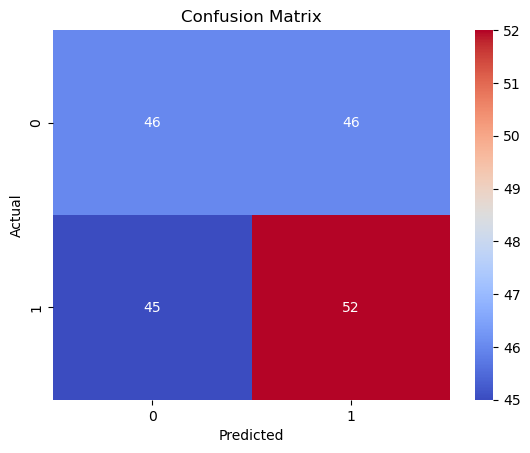

In [630]:
sns.heatmap(cm4,annot=True,cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');

In [631]:
# Classification report
print("Classification Report of XGB Classifier:\n", classification_report(y_test, y_pred_xgb))

Classification Report of XGB Classifier:
               precision    recall  f1-score   support

           0       0.51      0.50      0.50        92
           1       0.53      0.54      0.53        97

    accuracy                           0.52       189
   macro avg       0.52      0.52      0.52       189
weighted avg       0.52      0.52      0.52       189



In [634]:
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob_xgb)
print(fpr4)
print(tpr4)
print(thresholds4)

[0.         0.01086957 0.01086957 0.0326087  0.0326087  0.06521739
 0.06521739 0.07608696 0.07608696 0.08695652 0.08695652 0.11956522
 0.11956522 0.15217391 0.15217391 0.16304348 0.16304348 0.19565217
 0.19565217 0.20652174 0.20652174 0.2173913  0.2173913  0.22826087
 0.22826087 0.25       0.25       0.26086957 0.26086957 0.30434783
 0.30434783 0.31521739 0.31521739 0.32608696 0.32608696 0.34782609
 0.34782609 0.36956522 0.36956522 0.40217391 0.40217391 0.42391304
 0.42391304 0.4673913  0.4673913  0.5        0.5        0.5326087
 0.5326087  0.55434783 0.55434783 0.56521739 0.56521739 0.61956522
 0.61956522 0.63043478 0.63043478 0.65217391 0.65217391 0.66304348
 0.66304348 0.67391304 0.67391304 0.68478261 0.68478261 0.70652174
 0.70652174 0.73913043 0.73913043 0.75       0.75       0.76086957
 0.76086957 0.77173913 0.77173913 0.79347826 0.79347826 0.81521739
 0.81521739 0.82608696 0.82608696 0.89130435 0.89130435 0.90217391
 0.90217391 0.91304348 0.91304348 0.93478261 0.93478261 1.
 1. 

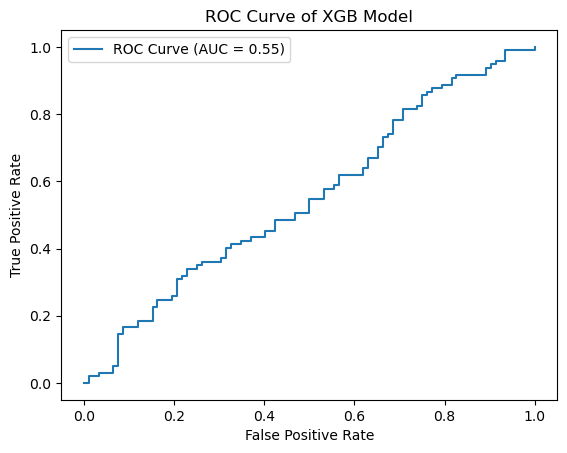

In [636]:
# ROC Curve
plt.plot(fpr4, tpr4, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob_xgb):.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGB Model')
plt.legend()
plt.show()

#### model building using Random Forest Classifier

In [639]:
from sklearn.ensemble import RandomForestClassifier

In [640]:
# Train model
rf = RandomForestClassifier(n_estimators=100,random_state=100)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=100)

In [642]:
# Predictions
y_pred_rand = rf.predict(x_test_scaled)
y_pred_prob_rand = rf.predict_proba(x_test_scaled)[:, 1]

In [643]:
y_pred_rand

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [644]:
y_pred_prob_rand

array([0.71, 0.4 , 0.51, 0.39, 0.49, 0.52, 0.65, 0.45, 0.58, 0.57, 0.39,
       0.62, 0.64, 0.59, 0.45, 0.53, 0.57, 0.49, 0.51, 0.63, 0.75, 0.63,
       0.27, 0.8 , 0.61, 0.51, 0.48, 0.51, 0.69, 0.54, 0.51, 0.41, 0.82,
       0.51, 0.62, 0.45, 0.69, 0.64, 0.41, 0.68, 0.43, 0.57, 0.33, 0.52,
       0.32, 0.66, 0.52, 0.61, 0.35, 0.44, 0.44, 0.66, 0.55, 0.34, 0.47,
       0.42, 0.72, 0.38, 0.53, 0.42, 0.54, 0.27, 0.5 , 0.4 , 0.51, 0.58,
       0.66, 0.6 , 0.63, 0.59, 0.59, 0.46, 0.53, 0.54, 0.41, 0.3 , 0.62,
       0.62, 0.64, 0.54, 0.63, 0.5 , 0.39, 0.47, 0.5 , 0.6 , 0.31, 0.57,
       0.62, 0.57, 0.66, 0.58, 0.47, 0.37, 0.37, 0.49, 0.45, 0.58, 0.45,
       0.73, 0.42, 0.5 , 0.6 , 0.62, 0.5 , 0.48, 0.55, 0.5 , 0.71, 0.56,
       0.66, 0.65, 0.55, 0.42, 0.32, 0.48, 0.5 , 0.45, 0.72, 0.28, 0.48,
       0.45, 0.44, 0.59, 0.3 , 0.48, 0.55, 0.5 , 0.74, 0.43, 0.59, 0.38,
       0.59, 0.67, 0.42, 0.2 , 0.49, 0.62, 0.59, 0.37, 0.67, 0.69, 0.62,
       0.44, 0.65, 0.52, 0.64, 0.49, 0.52, 0.5 , 0.

In [646]:
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rand))
print("AUC ((Random Forest):", roc_auc_score(y_test, y_pred_prob_rand))

Accuracy (Random Forest): 0.4973544973544973
AUC ((Random Forest): 0.5257731958762886


In [650]:
# Confusion matrix
cm5 = confusion_matrix(y_test, y_pred_rand)
print("Confusion Matrix:\n", cm5)

Confusion Matrix:
 [[41 51]
 [44 53]]


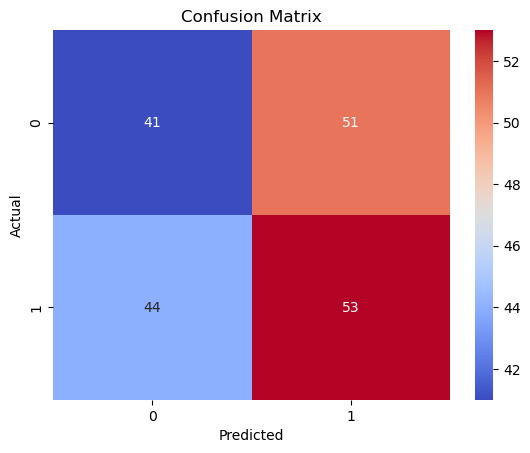

In [652]:
sns.heatmap(cm5,annot=True,cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');

In [653]:
# Classification report
print("Classification Report of Random Forest:\n", classification_report(y_test, y_pred_rand))

Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.48      0.45      0.46        92
           1       0.51      0.55      0.53        97

    accuracy                           0.50       189
   macro avg       0.50      0.50      0.50       189
weighted avg       0.50      0.50      0.50       189



In [655]:
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred_prob_rand)
print(fpr5)
print(tpr5)
print(thresholds5)

[0.         0.01086957 0.01086957 0.0326087  0.04347826 0.06521739
 0.06521739 0.06521739 0.10869565 0.13043478 0.19565217 0.20652174
 0.22826087 0.23913043 0.26086957 0.30434783 0.32608696 0.34782609
 0.36956522 0.38043478 0.42391304 0.4673913  0.51086957 0.55434783
 0.59782609 0.60869565 0.65217391 0.65217391 0.67391304 0.69565217
 0.73913043 0.77173913 0.79347826 0.80434783 0.81521739 0.84782609
 0.85869565 0.90217391 0.91304348 0.91304348 0.93478261 0.95652174
 0.97826087 0.97826087 0.98913043 1.        ]
[0.         0.         0.02061856 0.02061856 0.03092784 0.07216495
 0.08247423 0.10309278 0.11340206 0.13402062 0.1443299  0.17525773
 0.24742268 0.26804124 0.27835052 0.31958763 0.34020619 0.37113402
 0.3814433  0.42268041 0.43298969 0.48453608 0.50515464 0.54639175
 0.59793814 0.64948454 0.69072165 0.72164948 0.73195876 0.80412371
 0.82474227 0.84536082 0.87628866 0.89690722 0.90721649 0.91752577
 0.93814433 0.93814433 0.93814433 0.94845361 0.94845361 0.95876289
 0.97938144 0.98

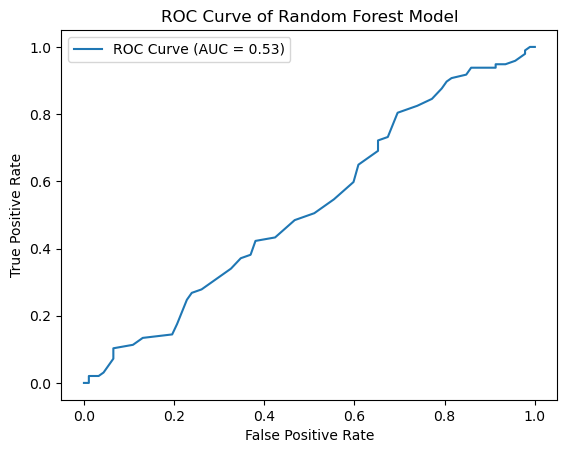

In [656]:
# ROC Curve
plt.plot(fpr5, tpr5, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob_rand):.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest Model')
plt.legend()
plt.show()

#### model building using SVM

In [658]:
from sklearn.svm import SVC

In [662]:
# training the model
svm_model = SVC(kernel='rbf', probability=True, random_state=100)
svm_model.fit(x_train, y_train)

SVC(probability=True, random_state=100)

In [663]:
y_pred_svm = svm_model.predict(x_test)
y_pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [664]:
y_pred_prob_svm = svm_model.predict_proba(x_test)[:, 1]
y_pred_prob_svm

array([0.51591405, 0.51637695, 0.51711914, 0.51689878, 0.51739717,
       0.51617945, 0.51689906, 0.51712306, 0.51614571, 0.51728959,
       0.51675866, 0.51709686, 0.5171117 , 0.51704862, 0.51722284,
       0.51433057, 0.51494166, 0.51706621, 0.51695813, 0.51707607,
       0.51639443, 0.51708046, 0.50711815, 0.51730164, 0.5173063 ,
       0.51688984, 0.51720186, 0.51616765, 0.51587032, 0.51180406,
       0.51726945, 0.51508896, 0.5170887 , 0.51718414, 0.51652873,
       0.51721908, 0.51725004, 0.51639425, 0.51048589, 0.51698779,
       0.51722792, 0.51702815, 0.51723429, 0.51722448, 0.51722736,
       0.51739745, 0.51734192, 0.51507658, 0.51722457, 0.51718302,
       0.51715366, 0.51716064, 0.51686001, 0.50995963, 0.51653974,
       0.51705142, 0.51645054, 0.51713298, 0.51709217, 0.51675462,
       0.51700152, 0.51366443, 0.5172333 , 0.51681159, 0.51142626,
       0.51715234, 0.51732719, 0.51687555, 0.51734847, 0.51692832,
       0.5173886 , 0.51383728, 0.51691339, 0.51678336, 0.51680

In [667]:
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("AUC (SVM):", roc_auc_score(y_test, y_pred_prob_svm))

Accuracy (SVM): 0.5132275132275133
AUC (SVM): 0.5072837292693859


In [668]:
# Confusion matrix
cm6 = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", cm6)

Confusion Matrix:
 [[ 1 91]
 [ 1 96]]


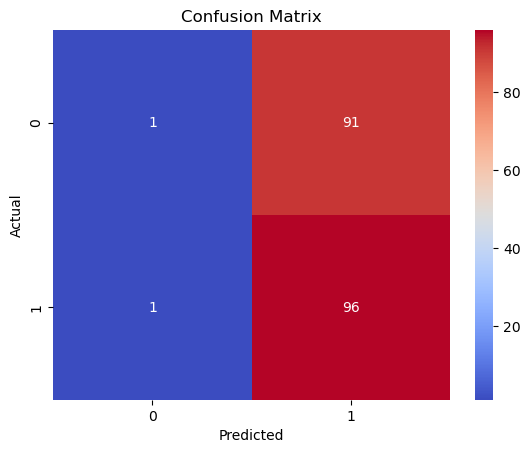

In [669]:
sns.heatmap(cm6,annot=True,cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');

In [671]:
# Classification report
print("Classification Report of SVM:\n", classification_report(y_test, y_pred_svm))

Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.50      0.01      0.02        92
           1       0.51      0.99      0.68        97

    accuracy                           0.51       189
   macro avg       0.51      0.50      0.35       189
weighted avg       0.51      0.51      0.36       189



In [674]:
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_prob_svm)
print(fpr6)
print(tpr6)
print(thresholds6)

[0.         0.01086957 0.01086957 0.02173913 0.02173913 0.0326087
 0.0326087  0.04347826 0.04347826 0.06521739 0.06521739 0.07608696
 0.07608696 0.08695652 0.08695652 0.09782609 0.09782609 0.10869565
 0.10869565 0.16304348 0.16304348 0.22826087 0.22826087 0.23913043
 0.23913043 0.25       0.25       0.30434783 0.30434783 0.33695652
 0.33695652 0.35869565 0.35869565 0.36956522 0.36956522 0.38043478
 0.38043478 0.39130435 0.39130435 0.40217391 0.40217391 0.43478261
 0.43478261 0.44565217 0.44565217 0.5        0.5        0.52173913
 0.52173913 0.5326087  0.5326087  0.55434783 0.55434783 0.56521739
 0.56521739 0.57608696 0.57608696 0.59782609 0.59782609 0.60869565
 0.60869565 0.63043478 0.63043478 0.65217391 0.65217391 0.66304348
 0.66304348 0.69565217 0.69565217 0.7173913  0.7173913  0.72826087
 0.72826087 0.75       0.75       0.76086957 0.76086957 0.7826087
 0.7826087  0.79347826 0.79347826 0.80434783 0.80434783 0.84782609
 0.84782609 0.85869565 0.85869565 0.88043478 0.88043478 0.902173

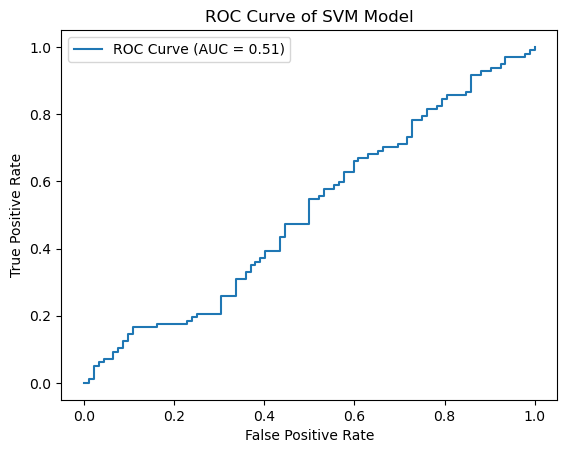

In [677]:
# ROC Curve
plt.plot(fpr6, tpr6, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob_svm):.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVM Model')
plt.legend()
plt.show()

#### model building using ANN

In [682]:
from sklearn.neural_network import MLPClassifier

In [684]:
# training the model
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=100)
ann_model.fit(x_train_scaled, y_train)

MLPClassifier(max_iter=500, random_state=100)

In [685]:
y_pred_ann = ann_model.predict(x_test_scaled)
y_pred_ann

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [687]:
y_pred_prob_ann = ann_model.predict_proba(x_test_scaled)[:, 1]
y_pred_prob_ann

array([0.76973035, 0.2001177 , 0.57531024, 0.61697414, 0.37025873,
       0.8769913 , 0.83644961, 0.45178774, 0.5811692 , 0.28399323,
       0.68187062, 0.8031475 , 0.42993367, 0.5391997 , 0.16274451,
       0.29982845, 0.43451302, 0.44244597, 0.49449548, 0.83828521,
       0.72030846, 0.5200089 , 0.18174374, 0.71239535, 0.55897808,
       0.57496871, 0.43900935, 0.83462812, 0.67917722, 0.81007704,
       0.269313  , 0.35100288, 0.87617425, 0.83654938, 0.59934925,
       0.17167305, 0.74854414, 0.61944526, 0.61305028, 0.73369527,
       0.49444968, 0.40180366, 0.49088852, 0.64023508, 0.67969481,
       0.78165155, 0.19885671, 0.78712483, 0.53342724, 0.78172951,
       0.32177523, 0.76961956, 0.20416463, 0.5592551 , 0.57980154,
       0.31878218, 0.25341361, 0.62862998, 0.79563525, 0.34643906,
       0.78932553, 0.34016341, 0.26882756, 0.33676305, 0.78476069,
       0.32187448, 0.87606577, 0.39060324, 0.48248799, 0.60832039,
       0.44453435, 0.67722051, 0.79540893, 0.7843853 , 0.46565

In [688]:
print("Accuracy (ANN):", accuracy_score(y_test, y_pred_ann))
print("AUC (ANN):", roc_auc_score(y_test, y_pred_prob_ann))

Accuracy (ANN): 0.5132275132275133
AUC (ANN): 0.5283505154639175


In [689]:
# Confusion matrix
cm7 = confusion_matrix(y_test, y_pred_ann)
print("Confusion Matrix:\n", cm7)

Confusion Matrix:
 [[45 47]
 [45 52]]


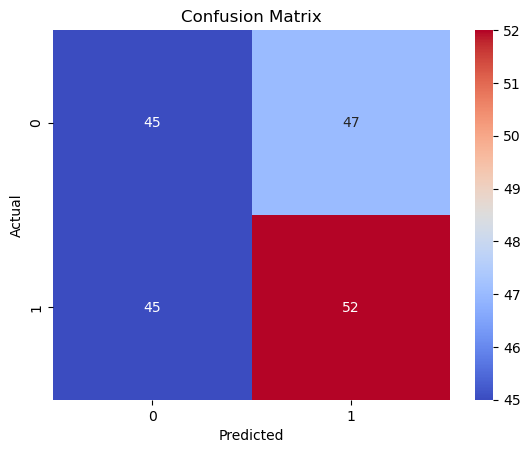

In [690]:
sns.heatmap(cm7,annot=True,cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');

In [691]:
# Classification report
print("Classification Report of ANN:\n", classification_report(y_test, y_pred_ann))

Classification Report of ANN:
               precision    recall  f1-score   support

           0       0.50      0.49      0.49        92
           1       0.53      0.54      0.53        97

    accuracy                           0.51       189
   macro avg       0.51      0.51      0.51       189
weighted avg       0.51      0.51      0.51       189



In [692]:
fpr7, tpr7, thresholds7 = roc_curve(y_test, y_pred_prob_ann)
print(fpr7)
print(tpr7)
print(thresholds7)

[0.         0.01086957 0.01086957 0.02173913 0.02173913 0.05434783
 0.05434783 0.06521739 0.06521739 0.07608696 0.07608696 0.11956522
 0.11956522 0.13043478 0.13043478 0.14130435 0.14130435 0.15217391
 0.15217391 0.17391304 0.17391304 0.18478261 0.18478261 0.19565217
 0.19565217 0.20652174 0.20652174 0.30434783 0.30434783 0.34782609
 0.34782609 0.35869565 0.35869565 0.36956522 0.36956522 0.39130435
 0.39130435 0.40217391 0.40217391 0.42391304 0.42391304 0.44565217
 0.44565217 0.4673913  0.4673913  0.47826087 0.47826087 0.48913043
 0.48913043 0.51086957 0.51086957 0.5326087  0.5326087  0.55434783
 0.55434783 0.57608696 0.57608696 0.58695652 0.58695652 0.59782609
 0.59782609 0.60869565 0.60869565 0.61956522 0.61956522 0.65217391
 0.65217391 0.67391304 0.67391304 0.69565217 0.69565217 0.70652174
 0.70652174 0.7173913  0.7173913  0.73913043 0.73913043 0.75
 0.75       0.76086957 0.76086957 0.77173913 0.77173913 0.7826087
 0.7826087  0.83695652 0.83695652 0.85869565 0.85869565 0.88043478
 0

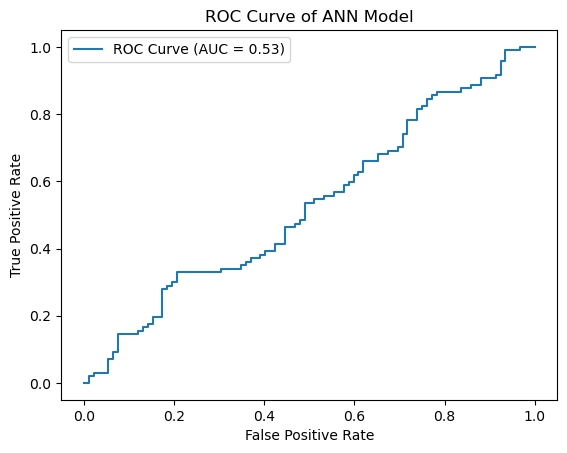

In [693]:
# ROC Curve
plt.plot(fpr7, tpr7, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob_ann):.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of ANN Model')
plt.legend()
plt.show()

#### model building using KNN

In [695]:
from sklearn.neighbors import KNeighborsClassifier

In [696]:
# taining the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [697]:
y_pred_knn = knn_model.predict(x_test_scaled)
y_pred_knn

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [698]:
y_pred_prob_knn = knn_model.predict_proba(x_test_scaled)[:, 1]
y_pred_prob_knn

array([1. , 0.4, 0.4, 0.4, 0.6, 0.8, 0.8, 0.4, 1. , 0.2, 0.6, 0.8, 0.4,
       0.6, 0.2, 0.2, 0.4, 0.4, 1. , 0.6, 0.6, 0.6, 0.2, 1. , 0.6, 0.4,
       0.4, 1. , 0.4, 0.6, 0.2, 0.6, 0.4, 0.6, 0.8, 0.6, 1. , 0.6, 0.6,
       0.6, 0.6, 0.6, 0.2, 0.6, 0.4, 0.6, 0.2, 0.8, 0.4, 0.8, 0. , 0.4,
       0.4, 0.4, 0.6, 0.2, 0.6, 0.4, 1. , 0.8, 0.6, 0.8, 0.4, 0.6, 0.6,
       0.4, 0.6, 0.8, 1. , 0.6, 0.6, 0.8, 0.8, 0.8, 0.4, 0.6, 1. , 0.4,
       0.2, 0.8, 0.6, 0.4, 0.6, 0.6, 0.6, 0.4, 0.8, 0. , 0.4, 0.8, 0.4,
       0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.8, 1. , 0.2, 0.6, 1. , 0.6,
       1. , 0.4, 0.6, 0.2, 0.6, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.4,
       0.4, 0.8, 0.6, 0.6, 0.4, 0.8, 0.2, 0.4, 0. , 0.4, 0.6, 0.8, 0.6,
       0.8, 0.4, 0.2, 1. , 0.8, 0.4, 0.6, 0.8, 0.2, 0.4, 1. , 1. , 0.4,
       0.4, 0.8, 0.4, 0.4, 0.6, 0.4, 0.6, 0.8, 0.6, 0.2, 0.8, 0.4, 0.4,
       0.4, 0.6, 0.6, 0.2, 0.6, 0.2, 0.2, 0.4, 0.4, 0.6, 0.4, 0.2, 0.6,
       0.6, 0.4, 0.2, 0.6, 0.4, 0.6, 0.2, 0.2, 0.8, 0.2, 0.2, 0.

In [699]:
print("Accuracy (k-NN):", accuracy_score(y_test, y_pred_knn))
print("AUC (k-NN):", roc_auc_score(y_test, y_pred_prob_knn))

Accuracy (k-NN): 0.6084656084656085
AUC (k-NN): 0.6246638278798745


In [714]:
# Confusion matrix
cm8 = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm8)

Confusion Matrix:
 [[53 39]
 [35 62]]


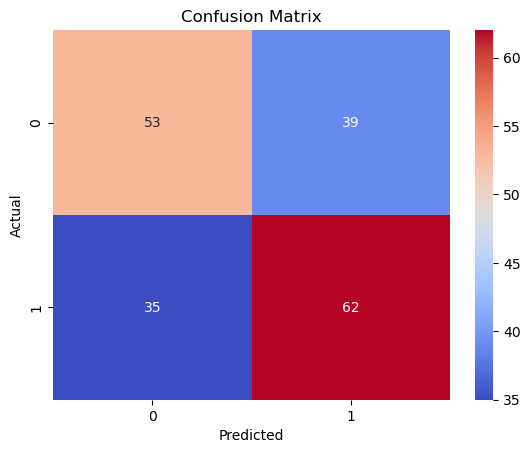

In [716]:
sns.heatmap(cm8,annot=True,cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');

In [717]:
# Classification report
print("Classification Report of KNN:\n", classification_report(y_test, y_pred_knn))

Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59        92
           1       0.61      0.64      0.63        97

    accuracy                           0.61       189
   macro avg       0.61      0.61      0.61       189
weighted avg       0.61      0.61      0.61       189



In [720]:
fpr8, tpr8, thresholds8 = roc_curve(y_test, y_pred_prob_knn)
print(fpr8)
print(tpr8)
print(thresholds8)

[0.         0.05434783 0.16304348 0.42391304 0.7826087  0.9673913
 1.        ]
[0.         0.10309278 0.26804124 0.63917526 0.89690722 1.
 1.        ]
[inf 1.  0.8 0.6 0.4 0.2 0. ]


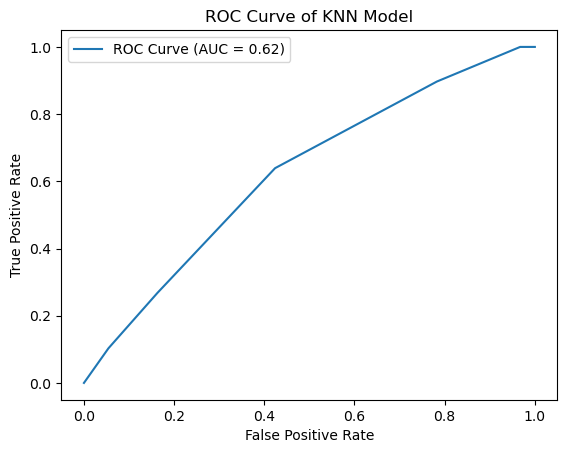

In [722]:
# ROC Curve
plt.plot(fpr8, tpr8, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob_knn):.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of KNN Model')
plt.legend()
plt.show()

#### model building using Naive Bayes

In [724]:
from sklearn.naive_bayes import GaussianNB

In [726]:
# training the model
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

GaussianNB()

In [728]:
y_pred_nb = nb_model.predict(x_test_scaled)
y_pred_nb

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [730]:
y_pred_prob_nb = nb_model.predict_proba(x_test_scaled)[:, 1]
y_pred_prob_nb

array([0.54387616, 0.51470768, 0.58040739, 0.55029259, 0.58420465,
       0.52202212, 0.59805124, 0.42694208, 0.43470543, 0.501017  ,
       0.44630686, 0.49134282, 0.46290604, 0.52983626, 0.4331131 ,
       0.53148105, 0.49569451, 0.58440999, 0.53968609, 0.56119067,
       0.54217831, 0.53077408, 0.47521396, 0.52694596, 0.58927873,
       0.48705838, 0.4619191 , 0.51452592, 0.47781336, 0.53241777,
       0.5178544 , 0.52999125, 0.46273827, 0.51287031, 0.53531589,
       0.49720107, 0.54740621, 0.43389618, 0.54534557, 0.55576673,
       0.52039957, 0.55763781, 0.56562365, 0.54192788, 0.51962323,
       0.5559401 , 0.53975592, 0.4992977 , 0.51845887, 0.52323737,
       0.49277058, 0.45842555, 0.52295061, 0.43838559, 0.55456697,
       0.49699966, 0.55999817, 0.46741574, 0.48326107, 0.47122793,
       0.59665566, 0.4570043 , 0.45468499, 0.57018652, 0.52684712,
       0.57858451, 0.57564932, 0.56711259, 0.5555977 , 0.5332091 ,
       0.56889422, 0.51035093, 0.55444743, 0.48770792, 0.40771

In [733]:
print("Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_nb))
print("AUC (Naive Bayes):", roc_auc_score(y_test, y_pred_prob_nb))

Accuracy (Naive Bayes): 0.544973544973545
AUC (Naive Bayes): 0.5812415956969968


In [734]:
# Confusion matrix
cm9 = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", cm9)

Confusion Matrix:
 [[35 57]
 [29 68]]


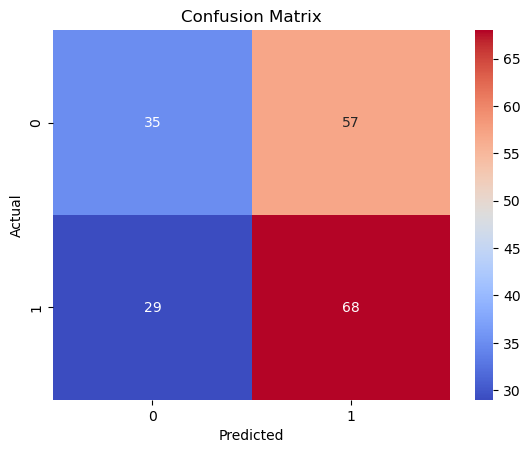

In [737]:
sns.heatmap(cm9,annot=True,cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');

In [738]:
# Classification report
print("Classification Report of NB:\n", classification_report(y_test, y_pred_nb))

Classification Report of NB:
               precision    recall  f1-score   support

           0       0.55      0.38      0.45        92
           1       0.54      0.70      0.61        97

    accuracy                           0.54       189
   macro avg       0.55      0.54      0.53       189
weighted avg       0.55      0.54      0.53       189



In [739]:
fpr9, tpr9, thresholds9 = roc_curve(y_test, y_pred_prob_nb)
print(fpr9)
print(tpr9)
print(thresholds9)

[0.         0.         0.0326087  0.0326087  0.04347826 0.04347826
 0.05434783 0.05434783 0.06521739 0.06521739 0.10869565 0.10869565
 0.11956522 0.11956522 0.13043478 0.13043478 0.14130435 0.14130435
 0.16304348 0.16304348 0.17391304 0.17391304 0.18478261 0.18478261
 0.20652174 0.20652174 0.22826087 0.22826087 0.23913043 0.23913043
 0.25       0.25       0.27173913 0.27173913 0.29347826 0.29347826
 0.32608696 0.32608696 0.34782609 0.34782609 0.35869565 0.35869565
 0.38043478 0.38043478 0.40217391 0.40217391 0.41304348 0.41304348
 0.45652174 0.45652174 0.4673913  0.4673913  0.5326087  0.5326087
 0.54347826 0.54347826 0.55434783 0.55434783 0.63043478 0.63043478
 0.64130435 0.64130435 0.66304348 0.66304348 0.73913043 0.73913043
 0.75       0.75       0.7826087  0.7826087  0.79347826 0.79347826
 0.82608696 0.82608696 0.86956522 0.86956522 0.88043478 0.88043478
 0.89130435 0.89130435 0.92391304 0.92391304 0.93478261 0.93478261
 0.94565217 0.94565217 0.95652174 0.95652174 0.9673913  0.96739

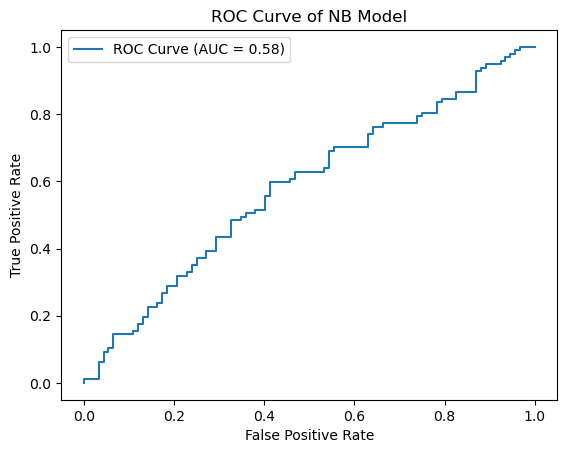

In [740]:
# ROC Curve
plt.plot(fpr9, tpr9, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob_nb):.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of NB Model')
plt.legend()
plt.show()

In [741]:
# for logistic model                    acc:0.54, AUC:0.54
# for logistic model with GridSearchCV  acc:0.56, AUC:0.52
# for Decision Tree model               acc:0.56, AUC:0.55
# for XGBoost mode                      acc:0.52, AUC:0.55
# for Random Forest Model               acc:0.50, AUC:0.53
# for SVM Model                         acc:0.51, AUC:0.51
# for ANN Model                         acc:0.51, AUC:0.53
# for KNN Model                         acc:0.61, AUC:0.62
# for Naive Bayes                       acc:0.54, AUC:0.58

In [742]:
# from this model building, KNN model gives better accuracy than others.

# 3. Model Deployment

In [744]:
knnmodel = KNeighborsClassifier(n_neighbors=5)

In [751]:
knnmodel.fit(features,target)

KNeighborsClassifier()

In [753]:
y_pred = knnmodel.predict(features)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,

In [754]:
accuracy_score(target,y_pred)

0.706

In [755]:
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(knn_model, 'model.pkl')

['model.pkl']

In [757]:
user_input = np.array([[33,6,1,1069.8,4.9,23,60.5,0,1]])  # Example user input
standardized_input = scaler.transform(user_input)

In [762]:
prediction = knnmodel.predict(standardized_input)
probability = knnmodel.predict_proba(standardized_input)[0]  # Get probabilities

In [764]:
prediction

array([1], dtype=int64)

In [766]:
probability

array([0.4, 0.6])